In [59]:
# tad related figures
# for fig3 and fig4

In [60]:
import pandas as pd
import scipy.stats as ss
from statannotations.Annotator import Annotator
from scipy.stats import chi2_contingency

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pybedtools import BedTool

In [62]:
commonFontsize=8

def config_rcparams():    
    plt.rcParams['font.family'] = ['sans-serif']
    plt.rcParams['font.sans-serif'] = ['arial']
    plt.rcParams['font.size'] = commonFontsize
    plt.rcParams['axes.labelsize'] = commonFontsize
    plt.rcParams['xtick.labelsize'] = commonFontsize
    plt.rcParams['ytick.labelsize'] = commonFontsize
    plt.rcParams['axes.titlesize'] = commonFontsize
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams['mathtext.fontset'] = 'custom'
    plt.rcParams['mathtext.cal'] = 'arial'
    plt.rcParams['mathtext.rm'] = 'arial' 
    plt.rcParams['axes.edgecolor'] = 'black'
    plt.rcParams['ytick.color'] = 'black'
    plt.rcParams['axes.linewidth'] = 0.7
    plt.rcParams['xtick.major.width'] = 0.7
    plt.rcParams['ytick.major.width'] = 0.7
    plt.rcParams['xtick.major.size' ] = 3
    plt.rcParams['ytick.major.size' ] = 3

config_rcparams()



In [63]:
#total set of integrations, hg19
combined=pd.read_csv('../../dataset/final_data/hpv_int/total_int.tsv', sep='\t')
combined

,chrom,start,end,sample,method,Author
0,chr2,195586244,195586545,TCGA-C5-A0TN,"RNA-seq,WGS",vifi
1,chr2,195587545,195588132,TCGA-C5-A0TN,RNA-seq,vifi
2,chr2,195600745,195601045,TCGA-C5-A0TN,RNA-seq,vifi
3,chr2,195609242,195609542,TCGA-C5-A0TN,RNA-seq,vifi
4,chr3,126832898,126833198,TCGA-C5-A0TN,RNA-seq,vifi
5,chr3,126848886,126849186,TCGA-C5-A0TN,WGS,vifi
6,chr4,29069328,29069628,TCGA-C5-A1BF,WGS,vifi
7,chr4,29071064,29071095,TCGA-C5-A1BF,WGS,vifi
8,chr4,29093334,29093634,TCGA-C5-A1BF,RNA-seq,vifi
9,chr3,189854772,189855072,TCGA-C5-A1BJ,RNA-seq,vifi


In [64]:
combined['sample'].nunique()

326

# hela tads

In [65]:
# hela tad domains, hg19
hela_tad=pd.read_excel('./datasets/mol213559-sup-0003-tables2.xlsx', sheet_name='HeLa TADs')
hela_tad

,Chromosome,Start (hg19),End (hg19),name
0,chr1,1020001,1220000,TAD1
1,chr1,1290001,1470000,TAD2
2,chr1,1850001,2110000,TAD3
3,chr1,2120001,2320000,TAD4
4,chr1,2340001,2500000,TAD5
5,chr1,2730001,3570000,TAD6
6,chr1,3990001,5930000,TAD7
7,chr1,6100001,6290000,TAD8
8,chr1,7270001,7710000,TAD9
9,chr1,7720001,8020000,TAD10


In [66]:
# check if any tad is overlapping   # NO overlap found
len(BedTool.from_dataframe(hela_tad).sort().merge())

3481

In [67]:
hela_tad=hela_tad.rename(columns={'name':'index'})

In [68]:
print(hela_tad['index'].nunique())

3481


In [69]:
# overlap of combined HPV integrations with hela tad
inter=BedTool.from_dataframe(hela_tad).intersect(BedTool.from_dataframe(combined), loj=True)
inter=BedTool.to_dataframe(inter)
inter=inter[inter['strand']!=-1]  # remove tads with no overlap
inter

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount
0,chr1,1020001,1220000,TAD1,chr1,1111311,1111312,TCGA-Q1-A73P,WXS,Pipas JM
1,chr1,1020001,1220000,TAD1,chr1,1111519,1111520,TCGA-Q1-A73P,WXS,Pipas JM
2,chr1,1020001,1220000,TAD1,chr1,1114252,1114253,TCGA-Q1-A73P,WXS,Pipas JM
3,chr1,1020001,1220000,TAD1,chr1,1114255,1114256,TCGA-Q1-A73P,WXS,Pipas JM
4,chr1,1020001,1220000,TAD1,chr1,1114804,1114805,TCGA-Q1-A73P,WXS,Pipas JM
5,chr1,1020001,1220000,TAD1,chr1,1114821,1114822,TCGA-Q1-A73P,WXS,Pipas JM
6,chr1,1020001,1220000,TAD1,chr1,1118707,1118708,TCGA-Q1-A73P,WXS,Pipas JM
7,chr1,1020001,1220000,TAD1,chr1,1120391,1120392,TCGA-Q1-A73P,WXS,Pipas JM
8,chr1,1020001,1220000,TAD1,chr1,1120925,1120926,TCGA-Q1-A73P,WXS,Pipas JM
9,chr1,1020001,1220000,TAD1,chr1,1126538,1126539,TCGA-Q1-A73P,WXS,Pipas JM


In [70]:
inter['name'].nunique()

246

In [71]:
inter['thickEnd'].nunique()

227

In [72]:
inter[inter['name']=='TAD853']

,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount
921,chr13,20750001,21060000,TAD853,chr13,20762830,20763358,TCGA-EA-A3HR,RNA-seq,vifi
922,chr13,20750001,21060000,TAD853,chr13,20925905,20926206,TCGA-C5-A2LT,"RNA-seq,WGS",vifi
923,chr13,20750001,21060000,TAD853,chr13,20931607,20932102,TCGA-C5-A2LT,RNA-seq,vifi
924,chr13,20750001,21060000,TAD853,chr13,20943530,20943830,TCGA-C5-A2LT,RNA-seq,vifi
925,chr13,20750001,21060000,TAD853,chr13,20945452,20945495,TCGA-C5-A2LT,RNA-seq,vifi
926,chr13,20750001,21060000,TAD853,chr13,21031662,21031962,TCGA-C5-A2LT,WGS,vifi


In [73]:
#count no of int and no_patient in each tad
rec_tad=inter.groupby('name').agg(no_int=('thickEnd', 'size'),\
                                  no_sample=('thickEnd', 'nunique')).reset_index()
rec_tad

,name,no_int,no_sample
0,TAD1,10,1
1,TAD1037,2,2
2,TAD1065,1,1
3,TAD1079,1,1
4,TAD1080,3,1
5,TAD1100,1,1
6,TAD1105,1,1
7,TAD1116,2,1
8,TAD1120,2,1
9,TAD1127,2,1


In [74]:
rec_tad['no_int'].sum()

765

In [75]:
rec_tad['no_sample'].value_counts()

1     217
2      21
6       2
3       2
22      1
15      1
5       1
4       1
Name: no_sample, dtype: int64

In [76]:
#samples which are present in rec tads
sample_rec_tad=inter[inter['name'].isin(rec_tad[rec_tad['no_sample']>2]['name'].tolist())]
print(sample_rec_tad['name'].nunique())
print(sample_rec_tad['thickEnd'].nunique())
sample_rec_tad

8
62


,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount
659,chr11,84440001,85300000,TAD603,chr11,84452568,84452569,T5116,Hybrid-capture; Sanger sequencing,Hu Z
660,chr11,84440001,85300000,TAD603,chr11,84497854,84497855,TCGA-ZJ-A8QR,WXS,Pipas JM
661,chr11,84440001,85300000,TAD603,chr11,84576776,84576777,TCGA-ZJ-A8QR,WXS,Pipas JM
662,chr11,84440001,85300000,TAD603,chr11,85004772,85004773,T6801,Hybrid-capture; Sanger sequencing,Hu Z
1078,chr14,68400001,69300000,TAD996,chr14,68421550,68421551,TCGA-4J-AA1J,WXS,Pipas JM
1079,chr14,68400001,69300000,TAD996,chr14,68596633,68596933,TCGA-EK-A2R8,RNA-seq,vifi
1080,chr14,68400001,69300000,TAD996,chr14,68616553,68616554,TCGA-MY-A5BD,WXS,Pipas JM
1081,chr14,68400001,69300000,TAD996,chr14,68644771,68646033,TCGA-EK-A2R8,"RNA-seq,WGS",vifi
1082,chr14,68400001,69300000,TAD996,chr14,68650323,68650623,TCGA-EK-A2R8,RNA-seq,vifi
1083,chr14,68400001,69300000,TAD996,chr14,68651176,68651476,TCGA-EK-A2R8,RNA-seq,vifi


In [77]:
len(sample_rec_tad.drop_duplicates(subset=['name','thickEnd'], keep='first'))

64

In [78]:
#make pivot table
pi=sample_rec_tad.drop_duplicates(subset=['name','thickEnd'], keep='first').pivot_table(\
               index='name', columns='thickEnd', aggfunc='size', fill_value=0)
pi

thickEnd,BC029,HOM0012,HOM0014,HOM0025,HOM0029,HOM0033,HOM0082,HOM0116,HOM0139,HOM0143,...,TCGA-MY-A5BD,TCGA-MY-A913,TCGA-Q1-A73R,TCGA-UC-A7PF,TCGA-ZJ-A8QQ,TCGA-ZJ-A8QR,TM0009,TM0018,TM0034,TM0039
name,,,,,,,,,,,,,,,,,,,,,
TAD1333,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TAD1369,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TAD1853,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TAD2252,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,1
TAD2320,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
TAD3189,1,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
TAD603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
TAD996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [79]:
sample_rec_tad[sample_rec_tad['name']=='TAD2320']['thickEnd'].unique()

array(['TCGA-C5-A1BJ', 'T03966', 'TM0018', 'HOM0014'], dtype=object)

In [80]:
rec_tad[rec_tad['no_sample']>2].sort_values(by='no_sample', ascending=False)

,name,no_int,no_sample
179,TAD3189,124,22
118,TAD2252,42,15
26,TAD1369,9,6
245,TAD996,16,6
24,TAD1333,15,5
125,TAD2320,8,4
82,TAD1853,6,3
225,TAD603,4,3


In [81]:
# get columns list (sample_order)
s_o=[]  # sample list orderded by tads which have most int
for item in rec_tad[rec_tad['no_sample']>2].sort_values(by='no_sample', ascending=False)['name'].to_list():
    a=sample_rec_tad[sample_rec_tad['name']==item]['thickEnd'].unique().tolist()
    s_o=s_o+a

print(len(s_o))
print(s_o)


64
['T2117', 'HOM0116', 'T4904', 'T9202', 'TCGA-FU-A40J', 'HOM0012', 'T8742', 'T05189', 'TCGA-EK-A2H1', 'TCGA-EA-A5O9', 'TCGA-UC-A7PF', 'TM0034', 'TCGA-EA-A3QD', 'HOM0029', 'TCGA-C5-A3HF', 'TCGA-LP-A7HU', 'TCGA-C5-A2M1', 'TCGA-LP-A5U2', 'TCGA-EA-A3HQ', 'TCGA-DG-A2KH', 'BC029', 'TCGA-C5-A3HE', 'HOM0139', 'TCGA-EK-A3GJ', 'TCGA-C5-A2LY', 'TM0039', 'HOM0143', 'T5601', 'TCGA-HG-A2PA', 'TCGA-JW-A5VG', 'T1804', 'TCGA-DS-A0VL', 'T8007', 'TCGA-C5-A1BJ', 'T3157', 'TCGA-MY-A913', 'T04426', 'TCGA-C5-A7UC', 'T01686', 'HOM0025', 'HOM0082', 'TM0009', 'TCGA-C5-A907', 'TCGA-4J-AA1J', 'TCGA-EK-A2R8', 'TCGA-MY-A5BD', 'TCGA-EA-A78R', 'TCGA-EA-A50E', 'TCGA-ZJ-A8QQ', 'T02707', 'TCGA-Q1-A73R', 'TCGA-DS-A7WF', 'TCGA-LP-A5U3', 'TCGA-C5-A1M9', 'TCGA-C5-A1BJ', 'T03966', 'TM0018', 'HOM0014', 'HOM0033', 'TCGA-LP-A7HU', 'TCGA-C5-A7CO', 'T5116', 'TCGA-ZJ-A8QR', 'T6801']


In [82]:
print(len(pd.DataFrame(s_o).drop_duplicates(subset=[0], keep='first')[0].to_list()))
#print(pd.DataFrame(s_o).drop_duplicates(subset=[0], keep='first')[0].to_list())

62


In [83]:
#change the column order in pi as above
pi=pi[pd.DataFrame(s_o).drop_duplicates(subset=[0], keep='first')[0].to_list()]
print(pi.columns.nunique())
pi

62


thickEnd,T2117,HOM0116,T4904,T9202,TCGA-FU-A40J,HOM0012,T8742,T05189,TCGA-EK-A2H1,TCGA-EA-A5O9,...,TCGA-LP-A5U3,TCGA-C5-A1M9,T03966,TM0018,HOM0014,HOM0033,TCGA-C5-A7CO,T5116,TCGA-ZJ-A8QR,T6801
name,,,,,,,,,,,,,,,,,,,,,
TAD1333,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
TAD1369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TAD1853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
TAD2252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TAD2320,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
TAD3189,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TAD603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
TAD996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#change the index order
pi=pi.reindex(rec_tad[rec_tad['no_sample']>2].sort_values(by='no_sample', ascending=False)['name'].tolist())
pi

thickEnd,T2117,HOM0116,T4904,T9202,TCGA-FU-A40J,HOM0012,T8742,T05189,TCGA-EK-A2H1,TCGA-EA-A5O9,...,TCGA-LP-A5U3,TCGA-C5-A1M9,T03966,TM0018,HOM0014,HOM0033,TCGA-C5-A7CO,T5116,TCGA-ZJ-A8QR,T6801
name,,,,,,,,,,,,,,,,,,,,,
TAD3189,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
TAD2252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TAD1369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TAD996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TAD1333,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
TAD2320,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
TAD1853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
TAD603,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [85]:
sample_rec_tad[sample_rec_tad['name']=='TAD1853']['thickEnd'].unique()

array(['HOM0033', 'TCGA-LP-A7HU', 'TCGA-C5-A7CO'], dtype=object)

In [86]:
# rearrange the table again
pi=pi.T.reset_index()
pi


name,thickEnd,TAD3189,TAD2252,TAD1369,TAD996,TAD1333,TAD2320,TAD1853,TAD603
0,T2117,1,0,0,0,0,0,0,0
1,HOM0116,1,0,0,0,0,0,0,0
2,T4904,1,0,0,0,0,0,0,0
3,T9202,1,0,0,0,0,0,0,0
4,TCGA-FU-A40J,1,0,0,0,0,0,0,0
5,HOM0012,1,0,0,0,0,0,0,0
6,T8742,1,0,0,0,0,0,0,0
7,T05189,1,0,0,0,0,0,0,0
8,TCGA-EK-A2H1,1,0,0,0,0,0,0,0
9,TCGA-EA-A5O9,1,0,0,0,0,0,0,0


In [87]:
#######

In [88]:
#regulatory hubs hpv int, hg19
reg=pd.read_excel('../../dataset/41525_2021_264_MOESM2_ESM.xlsx', sheet_name='Table S2_CESC breakpoints',\
                 skiprows=2)
reg

,Patient ID,Histology,Virus Type,HPV Breakpoint Start,HPV Breakpoint End,chrom,Integration Breakpoint,Integration ID #,# Breakpoints per integration locus,Integration Detection Method,...,Target gene,Transcriptionally Active,Overlapping SCNA,SCNA_mean,Distance from SCNA (bp),SCNA chrom,SCNA Start,SCNA End,SCNA Size (bp),Num_Probes
0,BC018,Squamous cell,HPV16,NaN,NaN,chr15,72444133,BC018_1,Breakpoints 1,Hybrid-capture,...,NaN,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
1,BC018,Squamous cell,HPV16,NaN,NaN,chr7,74919138,BC018_2,Breakpoints 1,Hybrid-capture,...,NaN,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
2,BC020,Squamous cell,HPV16,NaN,NaN,chr3,4829305,BC020_1,Breakpoints 1,Hybrid-capture,...,ITPR1,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
3,BC023,Squamous cell,HPV16,NaN,NaN,chr14,99706109,BC023_1,Breakpoints 1,Hybrid-capture,...,BCL11B,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
4,BC024,Squamous cell,HPV16,NaN,NaN,chr8,96084393,BC024_1,Breakpoints 1,Hybrid-capture,...,NaN,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
5,BC025,Squamous cell,HPV16,NaN,NaN,chr15,85934257,BC025_1,Breakpoints 1,Hybrid-capture,...,AKAP13,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
6,BC026,Squamous cell,HPV16,NaN,NaN,chr21,43205102,BC026_1,Breakpoints 1,Hybrid-capture,...,NaN,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
7,BC027,Squamous cell,HPV16,NaN,NaN,chr6,2902973,BC027_1,Breakpoints 1,Hybrid-capture,...,SERPINB9,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
8,BC029,Squamous cell,HPV16,NaN,NaN,chr8,128775817,BC029_1,Breakpoints 1,Hybrid-capture,...,MYC,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN
9,BC030,Squamous cell,HPV16,NaN,NaN,chr9,3374982,BC030_1,Breakpoints 1,Hybrid-capture,...,RFX3,Not reported,Not reported,Not reported,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
reg['Patient ID'].nunique()

333

In [90]:
# how many samples from pi are in reg dataset
len(pi[pi['thickEnd'].isin(reg['Patient ID'].unique().tolist())])

60

In [91]:
# hpv type and histology in each of the sample
reg_virus=reg.groupby('Patient ID').agg(hpv_type=('Virus Type', 'unique'), histology=('Histology', 'unique')).reset_index()
reg_virus['hpv_type']=reg_virus['hpv_type'].str.join(', ')
reg_virus['histology']=reg_virus['histology'].str.join(', ')
print(reg_virus['hpv_type'].value_counts())
print(reg_virus['histology'].value_counts())
reg_virus

HPV16                         224
HPV18                          57
HPV45                          14
HPV31                           7
HPV52                           5
HPV59                           4
HPV35                           3
HPV58                           3
HPV73                           3
HPV68                           3
HPV33                           2
HPV39                           2
HPV51                           2
HPV56                           1
HPV30                           1
HPV18; HPV16, HPV16; HPV18      1
HPV26                           1
Name: hpv_type, dtype: int64
Squamous cell     257
Not specified      43
Adenocarcinoma     27
Adenosquamous       6
Name: histology, dtype: int64


,Patient ID,hpv_type,histology
0,BC018,HPV16,Squamous cell
1,BC020,HPV16,Squamous cell
2,BC023,HPV16,Squamous cell
3,BC024,HPV16,Squamous cell
4,BC025,HPV16,Squamous cell
5,BC026,HPV16,Squamous cell
6,BC027,HPV16,Squamous cell
7,BC029,HPV16,Squamous cell
8,BC030,HPV16,Squamous cell
9,BC031,HPV16,Squamous cell


In [92]:
reg_virus[reg_virus['hpv_type']=='HPV18; HPV16, HPV16; HPV18']

,Patient ID,hpv_type,histology
203,TCGA-EA-A43B,"HPV18; HPV16, HPV16; HPV18",Squamous cell


In [93]:
#hpv status from tcga
hpv_t=pd.read_excel('/workspace/incubator/aks/hela_haplotype/dataset/hpv_status/Table_Files-Revised_Manuscript2/Supplemental Table 1-CESC_Data_Summary_Table_Supplement_V2.xlsx',\
                    sheet_name='supplemental table', skiprows=1)
hpv_t

,Unnamed: 0,CLIN:batch_number,CLIN:age_at_initial_pathologic_diagnosis,CLIN:vital_status,CLIN:days_to_last_followup,CLIN:days_to_last_known_alive,CLIN:days_to_death,CLIN:Hys_LN,CLIN:Hys_LVSI_LN,CLIN:race,...,SAMP:iCluster_Adeno_k2,SAMP:PARADIGM_k4,GEXP:APOBEC1:339,GEXP:APOBEC3A:200315,GEXP:APOBEC3B:9582,GEXP:APOBEC3C:27350,GEXP:APOBEC3D:140564,GEXP:APOBEC3F:200316,GEXP:APOBEC3G:60489,GEXP:APOBEC3H:164668
0,TCGA-BI-A0VR-01A,88,53.32,Alive,1505.0,1505,NaN,LNpos,LVSI_LNpos,WHITE,...,NaN,C1,0.011,11.194,9.901,9.600,8.253,8.225,9.823,4.772
1,TCGA-BI-A0VS-01A,88,48.84,Alive,1735.0,1735,NaN,LNneg,NaN,WHITE,...,NaN,C1,0.013,7.637,11.346,9.089,5.622,6.828,7.454,3.412
2,TCGA-BI-A20A-01A,127,49.87,Alive,720.0,720,NaN,LNneg,LVSI_LNneg,WHITE,...,NaN,C4,0.414,7.156,11.323,9.281,8.522,8.446,9.939,4.929
3,TCGA-C5-A0TN-01A,127,21.25,Dead,NaN,348,348.0,LNpos,LVSI_LNpos,BLACK_OR_AFRICAN_AMERICAN,...,NaN,C3,0.014,4.277,9.286,9.427,4.544,7.415,7.865,3.633
4,TCGA-C5-A1BE-01B,114,64.96,Dead,NaN,2094,2094.0,LNpos,LVSI_LNpos,WHITE,...,NaN,C1,0.014,10.101,9.864,9.216,7.595,8.012,8.756,3.018
5,TCGA-C5-A1BF-01B,114,46.48,Dead,NaN,570,570.0,NaN,NaN,WHITE,...,NaN,C1,0.003,6.306,6.718,8.302,6.394,7.166,7.898,3.598
6,TCGA-C5-A1BI-01B,114,31.66,Alive,1112.0,1112,NaN,NaN,NaN,WHITE,...,NaN,C1,0.011,10.513,10.709,9.633,6.886,7.061,8.722,4.670
7,TCGA-C5-A1BJ-01A,114,34.53,Alive,4385.0,4385,NaN,NaN,NaN,WHITE,...,NaN,C1,0.000,9.911,10.062,8.808,7.098,7.916,8.746,4.023
8,TCGA-C5-A1BK-01B,114,36.41,Alive,5385.0,5385,NaN,LNneg,NaN,BLACK_OR_AFRICAN_AMERICAN,...,NaN,C4,0.009,8.319,9.803,8.998,7.715,8.127,10.116,6.288
9,TCGA-C5-A1BL-01A,114,32.10,Alive,5271.0,5271,NaN,NaN,NaN,WHITE,...,NaN,C1,0.006,10.400,8.943,8.884,7.037,7.372,8.859,4.108


In [94]:
#change col name 
hpv_t=hpv_t.rename(columns={'Unnamed: 0': 'Patient ID'})
hpv_t.head()

,Patient ID,CLIN:batch_number,CLIN:age_at_initial_pathologic_diagnosis,CLIN:vital_status,CLIN:days_to_last_followup,CLIN:days_to_last_known_alive,CLIN:days_to_death,CLIN:Hys_LN,CLIN:Hys_LVSI_LN,CLIN:race,...,SAMP:iCluster_Adeno_k2,SAMP:PARADIGM_k4,GEXP:APOBEC1:339,GEXP:APOBEC3A:200315,GEXP:APOBEC3B:9582,GEXP:APOBEC3C:27350,GEXP:APOBEC3D:140564,GEXP:APOBEC3F:200316,GEXP:APOBEC3G:60489,GEXP:APOBEC3H:164668
0,TCGA-BI-A0VR-01A,88,53.32,Alive,1505.0,1505,NaN,LNpos,LVSI_LNpos,WHITE,...,NaN,C1,0.011,11.194,9.901,9.600,8.253,8.225,9.823,4.772
1,TCGA-BI-A0VS-01A,88,48.84,Alive,1735.0,1735,NaN,LNneg,NaN,WHITE,...,NaN,C1,0.013,7.637,11.346,9.089,5.622,6.828,7.454,3.412
2,TCGA-BI-A20A-01A,127,49.87,Alive,720.0,720,NaN,LNneg,LVSI_LNneg,WHITE,...,NaN,C4,0.414,7.156,11.323,9.281,8.522,8.446,9.939,4.929
3,TCGA-C5-A0TN-01A,127,21.25,Dead,NaN,348,348.0,LNpos,LVSI_LNpos,BLACK_OR_AFRICAN_AMERICAN,...,NaN,C3,0.014,4.277,9.286,9.427,4.544,7.415,7.865,3.633
4,TCGA-C5-A1BE-01B,114,64.96,Dead,NaN,2094,2094.0,LNpos,LVSI_LNpos,WHITE,...,NaN,C1,0.014,10.101,9.864,9.216,7.595,8.012,8.756,3.018


In [95]:
print(list(hpv_t))

['Patient ID', 'CLIN:batch_number', 'CLIN:age_at_initial_pathologic_diagnosis', 'CLIN:vital_status', 'CLIN:days_to_last_followup', 'CLIN:days_to_last_known_alive', 'CLIN:days_to_death', 'CLIN:Hys_LN', 'CLIN:Hys_LVSI_LN', 'CLIN:race', 'CLIN:ethnicity', 'CLIN:Dx_merged', 'CLIN:HPV_status', 'CLIN:HPV_Hcall', 'CLIN:HPV_Hclade', 'CLIN:HPV_clade_4', 'CLIN:HPV_int1', 'CLIN:clinStage', 'CLIN:dx_method', 'CLIN:LNposTF', 'CLIN:lymphovascular_invasion_indicator', 'CLIN:tumorStatus2', 'CLIN:UCEC-like', 'SAMP:Purity_Absolute', 'SAMP:Ploidy_Absolute', 'SAMP:EMT_score', 'CLIN:e6_cat_k4', 'CLIN:e6ratio_cat_k4', 'CLIN:e6spl_cat_k4', 'CLIN:e6sum_cat_k4', 'CLIN:E6_counts_combined', 'CLIN:E6_spliced_normalized_counts', 'CLIN:E6_unspliced_normalized_counts', 'CLIN:Ratio_E6_unspliced_to_spliced', 'SAMP:MutSig_rateNon_perMb', 'SAMP:MutSig_rateSil_perMb', 'SAMP:MutSig_rateTot_perMb', 'SAMP:hyperMut', 'SAMP:APOBEC_Category', 'SAMP:APOBEC_MutLoad_MinEstimate', 'SAMP:somatic_mutations_called', 'SAMP:mRNAseq_data

In [96]:
hpv_t['Patient ID'].nunique()

178

In [97]:
hpv_t['CLIN:HPV_Hcall'].value_counts()

HPV16       103
HPV18        27
HPV45        10
negative      9
HPV58         5
HPV52         5
HPV39         3
HPV59         3
HPV31         3
HPV33         3
HPV68         1
HPV30         1
HPV35         1
HPV56         1
HPV73         1
HPV69         1
HPV70         1
Name: CLIN:HPV_Hcall, dtype: int64

In [98]:
hpv_t['CLIN:Dx_merged'].value_counts()

Squamous          144
Adenocarcinoma     31
Adenosquamous       3
Name: CLIN:Dx_merged, dtype: int64

In [99]:
#select columns 
hpv_t=hpv_t[['Patient ID', 'CLIN:HPV_Hcall', 'CLIN:Dx_merged']]
hpv_t.columns=['Patient ID', 'hpv_type', 'histology']
hpv_t


,Patient ID,hpv_type,histology
0,TCGA-BI-A0VR-01A,HPV16,Squamous
1,TCGA-BI-A0VS-01A,HPV16,Squamous
2,TCGA-BI-A20A-01A,HPV16,Squamous
3,TCGA-C5-A0TN-01A,HPV16,Squamous
4,TCGA-C5-A1BE-01B,HPV16,Squamous
5,TCGA-C5-A1BF-01B,HPV18,Squamous
6,TCGA-C5-A1BI-01B,HPV16,Squamous
7,TCGA-C5-A1BJ-01A,HPV16,Squamous
8,TCGA-C5-A1BK-01B,HPV16,Squamous
9,TCGA-C5-A1BL-01A,HPV16,Squamous


In [100]:
# short id 
print(hpv_t['Patient ID'].str.len().value_counts())
hpv_t['Patient ID']=hpv_t['Patient ID'].str[:12]
print(hpv_t['Patient ID'].str.len().value_counts())
hpv_t

16    178
Name: Patient ID, dtype: int64
12    178
Name: Patient ID, dtype: int64


,Patient ID,hpv_type,histology
0,TCGA-BI-A0VR,HPV16,Squamous
1,TCGA-BI-A0VS,HPV16,Squamous
2,TCGA-BI-A20A,HPV16,Squamous
3,TCGA-C5-A0TN,HPV16,Squamous
4,TCGA-C5-A1BE,HPV16,Squamous
5,TCGA-C5-A1BF,HPV18,Squamous
6,TCGA-C5-A1BI,HPV16,Squamous
7,TCGA-C5-A1BJ,HPV16,Squamous
8,TCGA-C5-A1BK,HPV16,Squamous
9,TCGA-C5-A1BL,HPV16,Squamous


In [101]:
hpv_t['Patient ID'].nunique()

178

In [102]:
# merge these above tcga samples with reg_virus
reg_virus=pd.concat([reg_virus, hpv_t[~hpv_t['Patient ID'].isin(reg_virus['Patient ID'].tolist())]])
print(reg_virus['Patient ID'].nunique())
print(reg_virus['hpv_type'].value_counts())
print(reg_virus['histology'].value_counts())
reg_virus

398
HPV16                         257
HPV18                          64
HPV45                          19
negative                        9
HPV31                           8
HPV58                           6
HPV33                           5
HPV52                           5
HPV68                           4
HPV59                           4
HPV73                           3
HPV35                           3
HPV39                           3
HPV51                           2
HPV56                           1
HPV30                           1
HPV70                           1
HPV18; HPV16, HPV16; HPV18      1
HPV26                           1
HPV69                           1
Name: hpv_type, dtype: int64
Squamous cell     257
Squamous           51
Not specified      43
Adenocarcinoma     40
Adenosquamous       7
Name: histology, dtype: int64


,Patient ID,hpv_type,histology
0,BC018,HPV16,Squamous cell
1,BC020,HPV16,Squamous cell
2,BC023,HPV16,Squamous cell
3,BC024,HPV16,Squamous cell
4,BC025,HPV16,Squamous cell
5,BC026,HPV16,Squamous cell
6,BC027,HPV16,Squamous cell
7,BC029,HPV16,Squamous cell
8,BC030,HPV16,Squamous cell
9,BC031,HPV16,Squamous cell


In [103]:
#replace sq cell with sq
reg_virus['histology']=reg_virus['histology'].str.replace('Squamous cell', 'Squamous')
print(reg_virus['histology'].value_counts())
reg_virus

Squamous          308
Not specified      43
Adenocarcinoma     40
Adenosquamous       7
Name: histology, dtype: int64


,Patient ID,hpv_type,histology
0,BC018,HPV16,Squamous
1,BC020,HPV16,Squamous
2,BC023,HPV16,Squamous
3,BC024,HPV16,Squamous
4,BC025,HPV16,Squamous
5,BC026,HPV16,Squamous
6,BC027,HPV16,Squamous
7,BC029,HPV16,Squamous
8,BC030,HPV16,Squamous
9,BC031,HPV16,Squamous


In [104]:
#how many of tcga datasheet are in reg virus
reg_virus[reg_virus['Patient ID'].isin(hpv_t['Patient ID'].tolist())]['Patient ID'].nunique()

178

In [105]:
#merge reg virus with pi 
pi=pi.merge(reg_virus, left_on='thickEnd', right_on='Patient ID', how='left')
pi

,thickEnd,TAD3189,TAD2252,TAD1369,TAD996,TAD1333,TAD2320,TAD1853,TAD603,Patient ID,hpv_type,histology
0,T2117,1,0,0,0,0,0,0,0,T2117,HPV18,Not specified
1,HOM0116,1,0,0,0,0,0,0,0,HOM0116,HPV18,Adenocarcinoma
2,T4904,1,0,0,0,0,0,0,0,T4904,HPV18,Not specified
3,T9202,1,0,0,0,0,0,0,0,T9202,HPV18,Not specified
4,TCGA-FU-A40J,1,0,0,0,0,0,0,0,TCGA-FU-A40J,HPV16,Adenocarcinoma
5,HOM0012,1,0,0,0,0,0,0,0,HOM0012,HPV18,Adenocarcinoma
6,T8742,1,0,0,0,0,0,0,0,T8742,HPV18,Not specified
7,T05189,1,0,0,0,0,0,0,0,T05189,HPV16,Squamous
8,TCGA-EK-A2H1,1,0,0,0,0,0,0,0,TCGA-EK-A2H1,HPV16,Squamous
9,TCGA-EA-A5O9,1,0,0,0,0,0,0,0,TCGA-EA-A5O9,HPV16,Squamous


In [106]:
pi['Patient ID'].count()

62

In [107]:
pi['hpv_type'].value_counts()

HPV16    38
HPV18    15
HPV45     3
HPV31     2
HPV59     1
HPV58     1
HPV52     1
HPV68     1
Name: hpv_type, dtype: int64

In [108]:
pi['histology'].value_counts()

Squamous          39
Adenocarcinoma    12
Not specified     10
Adenosquamous      1
Name: histology, dtype: int64

In [109]:
pi['hpv_type'].unique()

array(['HPV18', 'HPV16', 'HPV58', 'HPV59', 'HPV45', 'HPV52', 'HPV68',
       'HPV31'], dtype=object)

In [110]:
#create the color palette for hpv types
col_p=dict(zip(pi.hpv_type.unique(),\
               ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']))
col_p

{'HPV18': '#1b9e77',
 'HPV16': '#d95f02',
 'HPV58': '#7570b3',
 'HPV59': '#e7298a',
 'HPV45': '#66a61e',
 'HPV52': '#e6ab02',
 'HPV68': '#a6761d',
 'HPV31': '#666666'}

In [111]:
pi.histology.unique()

array(['Not specified', 'Adenocarcinoma', 'Squamous', 'Adenosquamous'],
      dtype=object)

In [112]:
#create the color palette for histology
col_p1=dict(zip(pi.histology.unique(),\
               ['#e0e0e0', '#4d4d4d', '#67a9cf', '#b2182b']))
col_p1

{'Not specified': '#e0e0e0',
 'Adenocarcinoma': '#4d4d4d',
 'Squamous': '#67a9cf',
 'Adenosquamous': '#b2182b'}

In [113]:
#map the colors back to the pi df
pi['col_ht']=pi['hpv_type'].map(col_p)
pi['col_his']=pi['histology'].map(col_p1)
print(pi['col_ht'].nunique())
print(pi['col_his'].nunique())
pi


8
4


,thickEnd,TAD3189,TAD2252,TAD1369,TAD996,TAD1333,TAD2320,TAD1853,TAD603,Patient ID,hpv_type,histology,col_ht,col_his
0,T2117,1,0,0,0,0,0,0,0,T2117,HPV18,Not specified,#1b9e77,#e0e0e0
1,HOM0116,1,0,0,0,0,0,0,0,HOM0116,HPV18,Adenocarcinoma,#1b9e77,#4d4d4d
2,T4904,1,0,0,0,0,0,0,0,T4904,HPV18,Not specified,#1b9e77,#e0e0e0
3,T9202,1,0,0,0,0,0,0,0,T9202,HPV18,Not specified,#1b9e77,#e0e0e0
4,TCGA-FU-A40J,1,0,0,0,0,0,0,0,TCGA-FU-A40J,HPV16,Adenocarcinoma,#d95f02,#4d4d4d
5,HOM0012,1,0,0,0,0,0,0,0,HOM0012,HPV18,Adenocarcinoma,#1b9e77,#4d4d4d
6,T8742,1,0,0,0,0,0,0,0,T8742,HPV18,Not specified,#1b9e77,#e0e0e0
7,T05189,1,0,0,0,0,0,0,0,T05189,HPV16,Squamous,#d95f02,#67a9cf
8,TCGA-EK-A2H1,1,0,0,0,0,0,0,0,TCGA-EK-A2H1,HPV16,Squamous,#d95f02,#67a9cf
9,TCGA-EA-A5O9,1,0,0,0,0,0,0,0,TCGA-EA-A5O9,HPV16,Squamous,#d95f02,#67a9cf


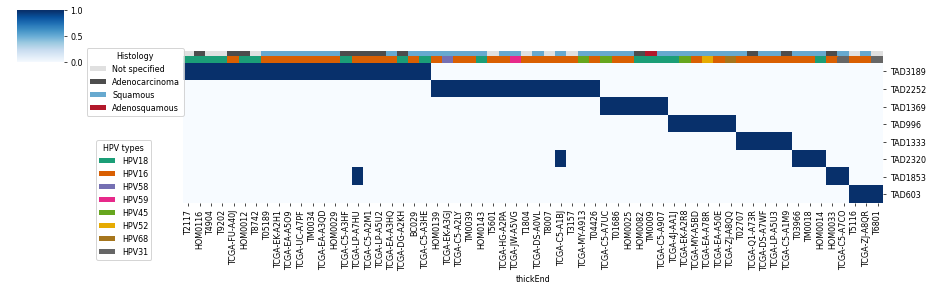

In [114]:
# draw the clustermap for hela rec tad, with hpv types and histology
sns.clustermap(pi.set_index('thickEnd').drop(columns=['Patient ID', 'hpv_type', 'histology',\
                                                      'col_ht', 'col_his']).T,\
            col_colors=[pi.set_index('thickEnd')['col_his'], pi.set_index('thickEnd')['col_ht']], \
            row_cluster=False, col_cluster=False, cmap='Blues', figsize=(13,4))

#draw legend for hpv subtypes
from matplotlib.patches import Patch

handles = [Patch(facecolor=col_p[name]) for name in col_p]
legend_ht=plt.legend(handles, col_p, title='HPV types',
           bbox_to_anchor=(0.1, 0.1), bbox_transform=plt.gcf().transFigure, loc='lower left')

#draw legend for histology
handles1 = [Patch(facecolor=col_p1[name]) for name in col_p1]
plt.legend(handles1, col_p1, title='Histology',
           bbox_to_anchor=(0.09, 0.6), bbox_transform=plt.gcf().transFigure, loc='lower left')

plt.gca().add_artist(legend_ht)


#plt.savefig('../figs/fig4/hela_tad.svg', bbox_inches='tight')

In [115]:
#check
#pi[pi['TAD1369']==1]
pi.head(n=10)

,thickEnd,TAD3189,TAD2252,TAD1369,TAD996,TAD1333,TAD2320,TAD1853,TAD603,Patient ID,hpv_type,histology,col_ht,col_his
0,T2117,1,0,0,0,0,0,0,0,T2117,HPV18,Not specified,#1b9e77,#e0e0e0
1,HOM0116,1,0,0,0,0,0,0,0,HOM0116,HPV18,Adenocarcinoma,#1b9e77,#4d4d4d
2,T4904,1,0,0,0,0,0,0,0,T4904,HPV18,Not specified,#1b9e77,#e0e0e0
3,T9202,1,0,0,0,0,0,0,0,T9202,HPV18,Not specified,#1b9e77,#e0e0e0
4,TCGA-FU-A40J,1,0,0,0,0,0,0,0,TCGA-FU-A40J,HPV16,Adenocarcinoma,#d95f02,#4d4d4d
5,HOM0012,1,0,0,0,0,0,0,0,HOM0012,HPV18,Adenocarcinoma,#1b9e77,#4d4d4d
6,T8742,1,0,0,0,0,0,0,0,T8742,HPV18,Not specified,#1b9e77,#e0e0e0
7,T05189,1,0,0,0,0,0,0,0,T05189,HPV16,Squamous,#d95f02,#67a9cf
8,TCGA-EK-A2H1,1,0,0,0,0,0,0,0,TCGA-EK-A2H1,HPV16,Squamous,#d95f02,#67a9cf
9,TCGA-EA-A5O9,1,0,0,0,0,0,0,0,TCGA-EA-A5O9,HPV16,Squamous,#d95f02,#67a9cf


# check if cancer genes or lncrna are there in these tads

In [116]:
# hg19 gene coordinates, gencode
hg19=pd.read_csv('/workspace/shared/dataset/others/hg19_gencode_coordinates/hg19_gencode_gene_coordinates.tsv', \
                 sep='\t')
hg19

,chr,start,end,strand,by,annot,gene_id,gene_type,gene_name
0,chr1,11869,14412,+,HAVANA,gene,ENSG00000223972.4,pseudogene,DDX11L1
1,chr1,14363,29806,-,HAVANA,gene,ENSG00000227232.4,pseudogene,WASH7P
2,chr1,29554,31109,+,HAVANA,gene,ENSG00000243485.2,lincRNA,MIR1302-11
3,chr1,34554,36081,-,HAVANA,gene,ENSG00000237613.2,lincRNA,FAM138A
4,chr1,52473,54936,+,HAVANA,gene,ENSG00000268020.2,pseudogene,OR4G4P
5,chr1,62948,63887,+,HAVANA,gene,ENSG00000240361.1,pseudogene,OR4G11P
6,chr1,69091,70008,+,HAVANA,gene,ENSG00000186092.4,protein_coding,OR4F5
7,chr1,89295,133566,-,HAVANA,gene,ENSG00000238009.2,lincRNA,RP11-34P13.7
8,chr1,89551,91105,-,HAVANA,gene,ENSG00000239945.1,lincRNA,RP11-34P13.8
9,chr1,131025,134836,+,HAVANA,gene,ENSG00000233750.3,pseudogene,CICP27


In [117]:
hg19['gene_name'].nunique()

55765

In [118]:
# genes involved in cancer, from cancer gene census
cancer_gen=pd.read_csv('/workspace/shared/projects/crc_cdfd/catalog_of_cancer_genes_latest/cancer_gene_census.csv', sep=',')
cancer_gen

,Gene Symbol,Name,Entrez GeneId,Genome Location,Tier,Hallmark,Chr Band,Somatic,Germline,Tumour Types(Somatic),Tumour Types(Germline),Cancer Syndrome,Tissue Type,Molecular Genetics,Role in Cancer,Mutation Types,Translocation Partner,Other Germline Mut,Other Syndrome,Synonyms
0,A1CF,APOBEC1 complementation factor,29974,10:50806729-50859940,2,NaN,10q11.23,yes,NaN,melanoma,NaN,NaN,E,NaN,oncogene,Mis,NaN,NaN,NaN,"29974,A1CF,ENSG00000148584,Q9NQ94"
1,ABI1,abl-interactor 1,10006,10:26748570-26860863,1,Yes,10p11.2,yes,NaN,AML,NaN,NaN,L,Dom,"TSG, fusion",T,KMT2A,NaN,NaN,"10006,ABI1,ENSG00000136754,Q8IZP0,SSH3BP1"
2,ABL1,v-abl Abelson murine leukemia viral oncogene h...,25,9:130835447-130885683,1,Yes,9q34.1,yes,NaN,"CML, ALL, T-ALL",NaN,NaN,L,Dom,"oncogene, fusion","T, Mis","BCR, ETV6, NUP214",NaN,NaN,"25,ABL,ABL1,ENSG00000097007,P00519"
3,ABL2,"c-abl oncogene 2, non-receptor tyrosine kinase",27,1:179107718-179143044,1,NaN,1q24-q25,yes,NaN,AML,NaN,NaN,L,Dom,"oncogene, fusion",T,ETV6,NaN,NaN,"27,ABL2,ABLL,ENSG00000143322,P42684"
4,ACKR3,atypical chemokine receptor 3,57007,2:236580466-236581554,1,Yes,2q37.3,yes,NaN,lipoma,NaN,NaN,M,Dom,"oncogene, fusion",T,HMGA2,NaN,NaN,"A8K6J4,ACKR3,CMKOR1,CXCR7,ENSG00000144476,P251..."
5,ACSL3,acyl-CoA synthetase long-chain family member 3,2181,2:222908773-222941654,1,Yes,2q36,yes,NaN,prostate,NaN,NaN,E,Dom,fusion,T,ETV1,NaN,NaN,"2181,ACSL3,ENSG00000123983,FACL3,O95573"
6,ACSL6,acyl-CoA synthetase long-chain family member 6,23305,5:131954234-132011553,2,NaN,5q31.1,yes,NaN,"AML, AEL",NaN,NaN,L,Dom,fusion,T,ETV6,NaN,NaN,"23305,ACSL6,ENSG00000164398,FACL6,Q9UKU0"
7,ACVR1,"activin A receptor, type I",90,2:157737531-157799493,1,Yes,2q23-q24,yes,NaN,DIPG,NaN,NaN,O,Dom,oncogene,Mis,NaN,yes,Fibrodysplasia ossificans progressiva,"90,ACVR1,ACVRLK2,ENSG00000115170,Q04771"
8,ACVR2A,activin A receptor type 2A,92,2:147845153-147927274,1,NaN,2q22.3-q23.1,yes,NaN,"large intestine carcinoma, stomach carcinoma, ...",NaN,NaN,E,Rec,TSG,"Mis, N, F",NaN,NaN,NaN,"92,ACVR2,ACVR2A,ENSG00000121989,P27037"
9,AFF1,"AF4/FMR2 family, member 1",4299,4:87007409-87135702,1,Yes,4q21,yes,NaN,AL,NaN,NaN,L,Dom,fusion,T,KMT2A,NaN,NaN,"4299,AFF1,ENSG00000172493,MLLT2,P51825,PBM1"


In [119]:
cancer_gen['Gene Symbol'].nunique()

723

In [120]:
cancer_gen['Role in Cancer'].value_counts()

TSG                      182
oncogene, fusion         137
fusion                   134
oncogene                 106
TSG, fusion               61
oncogene, TSG             41
oncogene, TSG, fusion     31
Name: Role in Cancer, dtype: int64

In [121]:
# select some cols
cancer_gen=cancer_gen[['Gene Symbol', 'Name', 'Tumour Types(Somatic)', 'Tumour Types(Germline)','Role in Cancer']]
cancer_gen

,Gene Symbol,Name,Tumour Types(Somatic),Tumour Types(Germline),Role in Cancer
0,A1CF,APOBEC1 complementation factor,melanoma,NaN,oncogene
1,ABI1,abl-interactor 1,AML,NaN,"TSG, fusion"
2,ABL1,v-abl Abelson murine leukemia viral oncogene h...,"CML, ALL, T-ALL",NaN,"oncogene, fusion"
3,ABL2,"c-abl oncogene 2, non-receptor tyrosine kinase",AML,NaN,"oncogene, fusion"
4,ACKR3,atypical chemokine receptor 3,lipoma,NaN,"oncogene, fusion"
5,ACSL3,acyl-CoA synthetase long-chain family member 3,prostate,NaN,fusion
6,ACSL6,acyl-CoA synthetase long-chain family member 6,"AML, AEL",NaN,fusion
7,ACVR1,"activin A receptor, type I",DIPG,NaN,oncogene
8,ACVR2A,activin A receptor type 2A,"large intestine carcinoma, stomach carcinoma, ...",NaN,TSG
9,AFF1,"AF4/FMR2 family, member 1",AL,NaN,fusion


In [122]:
hg19.head()

,chr,start,end,strand,by,annot,gene_id,gene_type,gene_name
0,chr1,11869,14412,+,HAVANA,gene,ENSG00000223972.4,pseudogene,DDX11L1
1,chr1,14363,29806,-,HAVANA,gene,ENSG00000227232.4,pseudogene,WASH7P
2,chr1,29554,31109,+,HAVANA,gene,ENSG00000243485.2,lincRNA,MIR1302-11
3,chr1,34554,36081,-,HAVANA,gene,ENSG00000237613.2,lincRNA,FAM138A
4,chr1,52473,54936,+,HAVANA,gene,ENSG00000268020.2,pseudogene,OR4G4P


In [123]:
print(len(cancer_gen[cancer_gen['Gene Symbol'].isin(hg19['gene_name'].unique().tolist())]))

713


In [124]:
# merge coordinates with cancer genes
cancer_gen_cord=hg19[['chr','start', 'end', 'gene_type', 'gene_name']].merge(cancer_gen, left_on='gene_name',\
                           right_on='Gene Symbol', how='inner')
cancer_gen_cord

,chr,start,end,gene_type,gene_name,Gene Symbol,Name,Tumour Types(Somatic),Tumour Types(Germline),Role in Cancer
0,chr1,2160134,2241558,protein_coding,SKI,SKI,SKI proto-oncogene,melanoma,NaN,oncogene
1,chr1,2487078,2496821,protein_coding,TNFRSF14,TNFRSF14,"tumor necrosis factor receptor superfamily, me...",follicular lymphoma,NaN,TSG
2,chr1,2985732,3355185,protein_coding,PRDM16,PRDM16,PR domain containing 16,"MDS, AML",NaN,"oncogene, fusion"
3,chr1,6241329,6269449,protein_coding,RPL22,RPL22,ribosomal protein L22 (EAP),"AML, CML",NaN,"TSG, fusion"
4,chr1,6845384,7829766,protein_coding,CAMTA1,CAMTA1,calmodulin binding transcription activator 1,epithelioid haemangioendothelioma,NaN,"TSG, fusion"
5,chr1,11166592,11322564,protein_coding,MTOR,MTOR,mechanistic target of rapamycin,"endometrial carcinoma, head and neck, clear ce...",NaN,oncogene
6,chr1,14026693,14151574,protein_coding,PRDM2,PRDM2,PR/SET domain 2,"glioma, colon adenocarcinoma, gastric carcinom...",NaN,TSG
7,chr1,15817327,15853029,protein_coding,CASP9,CASP9,caspase 9,glioma,NaN,TSG
8,chr1,16174359,16266955,protein_coding,SPEN,SPEN,spen family transcriptional repressor,"SMZL, adenoid cystic carcinoma, DLBCL",NaN,TSG
9,chr1,17345217,17380665,protein_coding,SDHB,SDHB,"succinate dehydrogenase complex, subunit B, ir...",NaN,"paraganglioma, pheochromocytoma",TSG


In [125]:
cancer_gen_cord['Gene Symbol'].nunique()

713

In [126]:
cancer_gen_cord[cancer_gen_cord.duplicated(subset=['gene_name'], keep=False)]

,chr,start,end,gene_type,gene_name,Gene Symbol,Name,Tumour Types(Somatic),Tumour Types(Germline),Role in Cancer
408,chr11,111957497,111990353,protein_coding,SDHD,SDHD,"succinate dehydrogenase complex, subunit D, in...",NaN,"paraganglioma, pheochromocytoma",TSG
409,chr11,111957627,112064528,protein_coding,SDHD,SDHD,"succinate dehydrogenase complex, subunit D, in...",NaN,"paraganglioma, pheochromocytoma",TSG
675,chrX,1314890,1331616,protein_coding,CRLF2,CRLF2,cytokine receptor-like factor 2,"B-ALL, Downs associated ALL",NaN,"oncogene, fusion"
676,chrY,1264890,1281616,protein_coding,CRLF2,CRLF2,cytokine receptor-like factor 2,"B-ALL, Downs associated ALL",NaN,"oncogene, fusion"
677,chrX,1581465,1656000,protein_coding,P2RY8,P2RY8,"purinergic receptor P2Y, G-protein coupled, 8","B-ALL, Down syndrome associated ALL",NaN,"oncogene, fusion"
678,chrY,1531465,1606000,protein_coding,P2RY8,P2RY8,"purinergic receptor P2Y, G-protein coupled, 8","B-ALL, Down syndrome associated ALL",NaN,"oncogene, fusion"


In [127]:
# just remove them Y chrom
cancer_gen_cord=cancer_gen_cord[cancer_gen_cord['chr']!='chrY']
cancer_gen_cord

,chr,start,end,gene_type,gene_name,Gene Symbol,Name,Tumour Types(Somatic),Tumour Types(Germline),Role in Cancer
0,chr1,2160134,2241558,protein_coding,SKI,SKI,SKI proto-oncogene,melanoma,NaN,oncogene
1,chr1,2487078,2496821,protein_coding,TNFRSF14,TNFRSF14,"tumor necrosis factor receptor superfamily, me...",follicular lymphoma,NaN,TSG
2,chr1,2985732,3355185,protein_coding,PRDM16,PRDM16,PR domain containing 16,"MDS, AML",NaN,"oncogene, fusion"
3,chr1,6241329,6269449,protein_coding,RPL22,RPL22,ribosomal protein L22 (EAP),"AML, CML",NaN,"TSG, fusion"
4,chr1,6845384,7829766,protein_coding,CAMTA1,CAMTA1,calmodulin binding transcription activator 1,epithelioid haemangioendothelioma,NaN,"TSG, fusion"
5,chr1,11166592,11322564,protein_coding,MTOR,MTOR,mechanistic target of rapamycin,"endometrial carcinoma, head and neck, clear ce...",NaN,oncogene
6,chr1,14026693,14151574,protein_coding,PRDM2,PRDM2,PR/SET domain 2,"glioma, colon adenocarcinoma, gastric carcinom...",NaN,TSG
7,chr1,15817327,15853029,protein_coding,CASP9,CASP9,caspase 9,glioma,NaN,TSG
8,chr1,16174359,16266955,protein_coding,SPEN,SPEN,spen family transcriptional repressor,"SMZL, adenoid cystic carcinoma, DLBCL",NaN,TSG
9,chr1,17345217,17380665,protein_coding,SDHB,SDHB,"succinate dehydrogenase complex, subunit B, ir...",NaN,"paraganglioma, pheochromocytoma",TSG


In [128]:
cancer_gen_cord['Gene Symbol'].nunique()

713

In [129]:
rec_tad[rec_tad['no_sample']>2].sort_values(by=['no_sample'])

,name,no_int,no_sample
82,TAD1853,6,3
225,TAD603,4,3
125,TAD2320,8,4
24,TAD1333,15,5
26,TAD1369,9,6
245,TAD996,16,6
118,TAD2252,42,15
179,TAD3189,124,22


In [130]:
# check if any of the cancer genes fall in recurrent tads (more than 2 sample)
cancer_gen_in_rec_tad=BedTool.from_dataframe(hela_tad[hela_tad['index'].isin(\
 rec_tad[rec_tad['no_sample']>2]['name'].tolist())]).intersect(BedTool.from_dataframe(cancer_gen_cord), loj=True)
cancer_gen_in_rec_tad=BedTool.to_dataframe(cancer_gen_in_rec_tad)
cancer_gen_in_rec_tad

/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 14 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,chr11,84440001,85300000,TAD603,.,-1,-1,.,.,.,.,.,.,.
1,chr14,68400001,69300000,TAD996,chr14,68286496,69196935,protein_coding,RAD51B,RAD51B,RAD51 paralog B,"lipoma, uterine leiomyoma",NaN,"TSG, fusion"
2,chr17,37690001,38320000,TAD1333,chr17,37617764,37721160,protein_coding,CDK12,CDK12,cyclin-dependent kinase 12,serous ovarian,NaN,TSG
3,chr17,37690001,38320000,TAD1333,chr17,37844167,37886679,protein_coding,ERBB2,ERBB2,v-erb-b2 erythroblastic leukemia viral oncogen...,"breast, ovarian, other tumour types, NSCLC, ga...",NaN,"oncogene, fusion"
4,chr17,57780001,57950000,TAD1369,.,-1,-1,.,.,.,.,.,.,.
5,chr20,30120001,30370000,TAD1853,.,-1,-1,.,.,.,.,.,.,.
6,chr3,188960001,190170000,TAD2252,chr3,189349205,189615068,protein_coding,TP63,TP63,tumor protein p63,"HNSCC, DLBCL",NSCLC,"oncogene, TSG"
7,chr4,74160001,75040000,TAD2320,.,-1,-1,.,.,.,.,.,.,.
8,chr8,128230001,128980000,TAD3189,chr8,128747680,128753674,protein_coding,MYC,MYC,v-myc myelocytomatosis viral oncogene homolog ...,"Burkitt lymphoma, amplified in other cancers, ...",NaN,"oncogene, fusion"


In [131]:
# cancer lncrna census
cancer_lncrna=pd.read_excel('/workspace/shared/dataset/others/cancer_lncrna/42003_2019_741_MOESM3_ESM.xlsx',\
                            sheet_name='main data')
cancer_lncrna

,NAME AS PUBLISHED,GENCODE ID,Oncogene (o) or Tumour Supp(t),Evidence level,Cancer Type - Homogenised,Cancer Type - From reference,Date added,PMID reference,PCAWG candidate,Closest pc-gene,Distance to closest pc-gene,Genomic classification
0,AATBC,ENSG00000215458,o,tv,urothelial,Bladder-TCC*,11 august 2016,25473900,NO,ENSG00000160214,465,convergent
1,ADAMTS9-AS2,ENSG00000241684,t,t,neuroepithelial,glioma,11 august 2016,24833086,NO,ENSG00000163638,2873,intronic_AS
2,AFAP1-AS1,ENSG00000272620,o,ptv,nasopharyngeal;colon;liver;esophageal;lung,NPC;Kidney-RCC*;HCC;ESCC;NSCLC;lung,6 june 2016,26246469; 27261589; 26892468; 26756568; 264636...,NO,ENSG00000196526,185837,exonic_AS
3,ANRIL,ENSG00000240498,o,gs,neuroepithelial;breast;skin;blood;thyroid,glioma;breast;basal cell carcinoma;Skin-Melano...,19 april 2016,19578367;20453838;19578363;20386740;21414664;2...,NO,ENSG00000147889,207,exonic_AS
4,AOC4P,ENSG00000260105,t,ptv,liver,HCC,11 august 2016,26160837,NO,ENSG00000131471,9015,samestrand; protcod upstream
5,AP001631.9,ENSG00000236663,o,t,stomach,GC,11 august 2016,26261500,NO,ENSG00000160202,27916,intergenic
6,APTR,ENSG00000214293,t,t,neuroepithelial,CNS-GBM*,11 august 2016,24748121,NO,ENSG00000187257,178,divergent
7,BANCR,ENSG00000278910,ot,ptv,thyroid;esophageal;urothelial;skin;lung;colon;...,PTC;ESCC;Bladder-TCC*;Skin-Melanoma*;NSCLC;Kid...,12 august 2016,27462868; 27470379; 27514530; 22581800; 246555...,NO,ENSG00000135063,17595,intergenic
8,BCAR4,ENSG00000262117,o,pt,breast,breast,19 april 2016,21506106,NO,ENSG00000171490,5005,samestrand; protcod upstream
9,CASC15,ENSG00000272168,o,pst,neuroepithelial;skin,neuroblastoma;Skin-Melanoma*,6 june 2016,26100672;26016895,NO,ENSG00000172179,72739,intergenic


In [132]:
cancer_lncrna['NAME AS PUBLISHED'].nunique()

122

In [133]:
cancer_lncrna['GENCODE ID'].nunique()

122

In [134]:
cancer_lncrna['Oncogene (o) or Tumour Supp(t)'].value_counts()

o     77
t     35
ot    10
Name: Oncogene (o) or Tumour Supp(t), dtype: int64

In [135]:
hg19.head()

,chr,start,end,strand,by,annot,gene_id,gene_type,gene_name
0,chr1,11869,14412,+,HAVANA,gene,ENSG00000223972.4,pseudogene,DDX11L1
1,chr1,14363,29806,-,HAVANA,gene,ENSG00000227232.4,pseudogene,WASH7P
2,chr1,29554,31109,+,HAVANA,gene,ENSG00000243485.2,lincRNA,MIR1302-11
3,chr1,34554,36081,-,HAVANA,gene,ENSG00000237613.2,lincRNA,FAM138A
4,chr1,52473,54936,+,HAVANA,gene,ENSG00000268020.2,pseudogene,OR4G4P


In [136]:
hg19['gene_id'].str.split('.', expand=True)[1].str.len().value_counts()

1    51797
2     6023
Name: 1, dtype: int64

In [137]:
# process 
hg19['gene_id']=hg19['gene_id'].str.split('.', expand=True)[0]
print(hg19['gene_id'].nunique())
hg19.head()

57820


,chr,start,end,strand,by,annot,gene_id,gene_type,gene_name
0,chr1,11869,14412,+,HAVANA,gene,ENSG00000223972,pseudogene,DDX11L1
1,chr1,14363,29806,-,HAVANA,gene,ENSG00000227232,pseudogene,WASH7P
2,chr1,29554,31109,+,HAVANA,gene,ENSG00000243485,lincRNA,MIR1302-11
3,chr1,34554,36081,-,HAVANA,gene,ENSG00000237613,lincRNA,FAM138A
4,chr1,52473,54936,+,HAVANA,gene,ENSG00000268020,pseudogene,OR4G4P


In [138]:
len(hg19)

57820

In [139]:
len(cancer_lncrna[cancer_lncrna['GENCODE ID'].isin(hg19['gene_id'].tolist())])

107

In [140]:
# get coordinates for cancer lincrna
cancer_lncrna_cord=hg19.merge(cancer_lncrna[['NAME AS PUBLISHED', 'GENCODE ID',\
                        'Oncogene (o) or Tumour Supp(t)']], left_on='gene_id',\
                         right_on='GENCODE ID', how='inner')
cancer_lncrna_cord

,chr,start,end,strand,by,annot,gene_id,gene_type,gene_name,NAME AS PUBLISHED,GENCODE ID,Oncogene (o) or Tumour Supp(t)
0,chr1,2976179,2985001,-,HAVANA,gene,ENSG00000177133,antisense,LINC00982,LINC00982,ENSG00000177133,t
1,chr1,150488233,150490508,+,HAVANA,gene,ENSG00000228126,lincRNA,LINC00568,FAL1,ENSG00000228126,o
2,chr1,159931008,159948851,+,HAVANA,gene,ENSG00000224259,lincRNA,RP11-48O20.4,LINC01133,ENSG00000224259,ot
3,chr1,173833038,173838020,-,HAVANA,gene,ENSG00000234741,processed_transcript,GAS5,GAS5,ENSG00000234741,t
4,chr1,180528112,180535654,+,HAVANA,gene,ENSG00000236719,lincRNA,RP11-522D2.1,OVAL,ENSG00000236719,o
5,chr1,202780082,202781284,+,HAVANA,gene,ENSG00000228288,antisense,PCAT6,PCAN-R1,ENSG00000228288,o
6,chr1,211556145,211605878,+,HAVANA,gene,ENSG00000153363,processed_transcript,LINC00467,LINC00467,ENSG00000153363,t
7,chr1,238643684,238649323,-,HAVANA,gene,ENSG00000215808,lincRNA,RP11-371I1.2,LINK-A,ENSG00000215808,o
8,chr2,16060521,16076139,+,HAVANA,gene,ENSG00000223850,lincRNA,MYCNUN,lncUSMycN,ENSG00000223850,t
9,chr2,87754887,87906324,+,HAVANA,gene,ENSG00000222041,lincRNA,LINC00152,LINC00152,ENSG00000222041,o


In [141]:
cancer_lncrna_cord['GENCODE ID'].nunique()

107

In [142]:
cancer_lncrna_cord['gene_name'].nunique()

107

In [143]:
cancer_lncrna_cord['gene_type'].value_counts()

lincRNA                 50
antisense               31
processed_transcript    16
pseudogene               5
sense_overlapping        3
protein_coding           2
Name: gene_type, dtype: int64

In [144]:
cancer_lncrna_cord[cancer_lncrna_cord['gene_type']=='protein_coding']

,chr,start,end,strand,by,annot,gene_id,gene_type,gene_name,NAME AS PUBLISHED,GENCODE ID,Oncogene (o) or Tumour Supp(t)
67,chr13,50656307,51297372,+,HAVANA,gene,ENSG00000176124,protein_coding,DLEU1,DLEU1,ENSG00000176124,t
74,chr14,106383838,106391825,+,HAVANA,gene,ENSG00000226777,protein_coding,KIAA0125,linc-ITGB1 / KIAA0125,ENSG00000226777,o


In [145]:
# check if any of the cancer lncrnas fall in recurrent tads
cancer_lncrna_in_rec_tad=BedTool.from_dataframe(hela_tad[hela_tad['index'].isin(\
 rec_tad[rec_tad['no_sample']>2]['name'].tolist())]).intersect(BedTool.from_dataframe(cancer_lncrna_cord), loj=True)
cancer_lncrna_in_rec_tad=BedTool.to_dataframe(cancer_lncrna_in_rec_tad)
cancer_lncrna_in_rec_tad

/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 16 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,chr11,84440001,85300000,TAD603,.,-1,-1,.,.,.,.,.,.,.,.,.
1,chr14,68400001,69300000,TAD996,.,-1,-1,.,.,.,.,.,.,.,.,.
2,chr17,37690001,38320000,TAD1333,.,-1,-1,.,.,.,.,.,.,.,.,.
3,chr17,57780001,57950000,TAD1369,.,-1,-1,.,.,.,.,.,.,.,.,.
4,chr20,30120001,30370000,TAD1853,.,-1,-1,.,.,.,.,.,.,.,.,.
5,chr3,188960001,190170000,TAD2252,.,-1,-1,.,.,.,.,.,.,.,.,.
6,chr4,74160001,75040000,TAD2320,.,-1,-1,.,.,.,.,.,.,.,.,.
7,chr8,128230001,128980000,TAD3189,chr8,128220111,128231333,-,HAVANA,gene,ENSG00000247844,lincRNA,CCAT1,CCAT1,ENSG00000247844,o
8,chr8,128230001,128980000,TAD3189,chr8,128806779,129113499,+,HAVANA,gene,ENSG00000249859,processed_transcript,PVT1,PVT1,ENSG00000249859,o


In [146]:
##############

In [147]:
# cesc gene expression data, tcga 
cesc_gene=pd.read_csv('/workspace/shared/dataset/tcga_exome/expression/data_parsed/CESC.tsv', sep='\t')
cesc_gene

,Hybridization REF,TCGA-2W-A8YY-01A-11R-A37O-07,TCGA-4J-AA1J-01A-21R-A38B-07,TCGA-BI-A0VR-01A-11R-A10U-07,TCGA-BI-A0VS-01A-11R-A10U-07,TCGA-BI-A20A-01A-11R-A14Y-07,TCGA-C5-A0TN-01A-21R-A14Y-07,TCGA-C5-A1BE-01B-11R-A13Y-07,TCGA-C5-A1BF-01B-11R-A13Y-07,TCGA-C5-A1BI-01B-11R-A13Y-07,...,TCGA-ZJ-AAXD-01A-21R-A42T-07,TCGA-ZJ-AAXF-01A-31R-A42T-07,TCGA-ZJ-AAXI-01A-11R-A42T-07,TCGA-ZJ-AAXJ-01A-11R-A42T-07,TCGA-ZJ-AAXN-01A-11R-A42T-07,TCGA-ZJ-AAXT-01A-11R-A42T-07,TCGA-ZJ-AAXU-01A-11R-A42T-07,TCGA-ZJ-AB0H-01A-11R-A42T-07,TCGA-ZJ-AB0I-01A-11R-A42T-07,TCGA-ZX-AA5X-01A-11R-A42T-07
0,A1BG,71.1123,27.2619,27.5155,66.6540,38.0343,16.8672,10.9467,228.7558,48.5042,...,53.8313,57.0363,20.0831,24.9447,94.8938,66.9044,77.6831,77.0631,24.2131,79.3117
1,A1CF,0.0000,0.4272,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3304,...,0.0000,0.0000,0.0000,0.0000,1.8297,0.4270,0.0000,0.0000,0.0000,0.0000
2,A2BP1,0.7153,4.2717,0.0000,0.3445,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.9166,3.3602,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.7734
3,A2LD1,101.1159,110.2050,70.1680,37.3611,165.5431,121.2849,84.5740,83.5787,86.3996,...,20.1467,51.7137,83.7188,125.9063,91.2161,50.1708,42.8439,102.5728,49.9153,59.6984
4,A2ML1,58.6552,3340.0256,623.6369,181.5520,1079.8378,19.8437,2283.4320,91.0022,20532.5845,...,1206.2328,14583.3333,722.9917,1310.8027,616.0883,1871.0504,1982.1014,12329.4903,2039.9516,3899.4586
5,A2M,2818.2439,4097.7873,3113.8186,3645.8048,5192.2793,557.1127,2046.6568,5439.9516,3634.5024,...,4383.1164,4657.9032,801.8629,518.3907,2233.7842,1774.1161,1484.5277,4219.6359,1024.2070,9581.5468
6,A4GALT,114.4492,965.8266,911.2879,739.6434,819.0618,930.1749,3184.6154,1169.0553,1298.0920,...,815.7654,941.5323,119.1136,1172.3999,2138.1428,581.9812,659.9271,995.7524,2128.9346,926.5275
7,A4GNT,0.3577,2.1358,0.7859,1.0335,0.3309,1.4883,0.2959,0.7166,0.6608,...,0.9166,0.0000,1.3850,1.6093,1.3069,0.0000,0.0000,1.8204,0.6053,0.7734
8,AAA1,0.0000,0.0000,0.0000,0.3445,0.0000,0.0000,0.2959,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.2614,0.0000,0.0000,0.0000,0.0000,0.0000
9,AAAS,1056.1516,896.6254,617.3494,994.5741,984.1979,1152.4247,644.3787,942.9830,705.3771,...,1096.2420,1006.7204,1344.1828,1402.5347,884.2711,1056.3621,1036.7915,813.1068,807.5061,641.9180


In [148]:
cesc_gene['Hybridization REF'].nunique()

20500

In [149]:
# process
cesc_gene=cesc_gene.set_index('Hybridization REF')
cesc_gene=cesc_gene.T
cesc_gene

Hybridization REF,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-2W-A8YY-01A-11R-A37O-07,71.1123,0.0000,0.7153,101.1159,58.6552,2818.2439,114.4492,0.3577,0.0000,1056.1516,...,32.5465,299.3562,1256.0801,0.3577,740.7010,3442.0601,1228.8984,903.0758,2.5036,0.0000
TCGA-4J-AA1J-01A-21R-A38B-07,27.2619,0.4272,4.2717,110.2050,3340.0256,4097.7873,965.8266,2.1358,0.0000,896.6254,...,43.1440,416.9158,928.6630,15.3780,747.1166,4852.6271,643.3148,812.0461,8.1162,0.0000
TCGA-BI-A0VR-01A-11R-A10U-07,27.5155,0.0000,0.0000,70.1680,623.6369,3113.8186,911.2879,0.7859,0.0000,617.3494,...,56.1941,559.9764,2466.6470,178.4065,787.8966,3697.0233,1247.6668,1034.2863,4.7156,0.3930
TCGA-BI-A0VS-01A-11R-A10U-07,66.6540,0.0000,0.3445,37.3611,181.5520,3645.8048,739.6434,1.0335,0.3445,994.5741,...,50.6416,258.7202,1623.6328,96.8048,449.5737,5025.5792,944.9660,802.6871,9.9905,0.3445
TCGA-BI-A20A-01A-11R-A14Y-07,38.0343,0.0000,0.0000,165.5431,1079.8378,5192.2793,819.0618,0.3309,0.0000,984.1979,...,59.2372,460.3293,1623.8934,32.1006,579.1346,2994.9533,1002.0683,512.2859,4.6331,0.0000
TCGA-C5-A0TN-01A-21R-A14Y-07,16.8672,0.0000,0.0000,121.2849,19.8437,557.1127,930.1749,1.4883,0.0000,1152.4247,...,34.2304,284.2614,440.5308,106.6601,581.9174,3890.3634,703.4603,726.7766,0.4961,0.0000
TCGA-C5-A1BE-01B-11R-A13Y-07,10.9467,0.0000,0.0000,84.5740,2283.4320,2046.6568,3184.6154,0.2959,0.2959,644.3787,...,39.6450,205.9172,994.3787,205.6213,708.2840,1973.6686,482.5444,686.6864,3.5503,0.2959
TCGA-C5-A1BF-01B-11R-A13Y-07,228.7558,0.0000,0.0000,83.5787,91.0022,5439.9516,1169.0553,0.7166,0.0000,942.9830,...,35.4693,295.5779,841.9491,70.9387,774.2349,6702.2734,898.1985,662.0945,15.7642,0.0000
TCGA-C5-A1BI-01B-11R-A13Y-07,48.5042,0.3304,0.0000,86.3996,20532.5845,3634.5024,1298.0920,0.6608,0.0000,705.3771,...,20.8144,197.2413,1341.3728,62.1128,589.4111,3605.5175,1281.5726,730.1561,4.6254,0.0000
TCGA-C5-A1BJ-01A-11R-A13Y-07,29.5669,0.0000,0.0000,120.2013,3121.2804,3220.6216,853.6761,2.3980,0.0000,582.0519,...,42.9454,334.8433,1276.3722,218.8689,611.6995,2818.7007,779.3391,760.5914,8.0659,0.0000


In [152]:
# log2
cesc_gene=np.log2(cesc_gene+1)
cesc_gene

Hybridization REF,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-2W-A8YY-01A-11R-A37O-07,6.172173,0.000000,0.778461,6.674064,5.898576,11.461093,6.851114,0.441165,0.000000,10.045967,...,5.068090,8.230531,10.295861,0.441165,9.534694,11.749476,10.264323,9.820300,1.808838,0.000000
TCGA-4J-AA1J-01A-21R-A38B-07,4.820787,0.513188,2.398268,6.797078,11.706075,12.000981,9.917113,1.648834,0.000000,9.809970,...,5.464145,8.707068,9.860564,4.033687,9.547119,12.244848,9.331622,9.667193,3.188433,0.000000
TCGA-BI-A0VR-01A-11R-A10U-07,4.833674,0.000000,0.000000,6.153157,9.286874,11.604932,9.833345,0.836651,0.000000,9.272278,...,5.837794,9.131796,11.268920,7.487088,9.623692,11.852539,10.286173,10.015814,2.514905,0.478195
TCGA-BI-A0VS-01A-11R-A10U-07,6.080103,0.000000,0.427070,5.261572,7.512164,11.832417,9.532635,1.023965,0.427070,9.959385,...,5.690462,8.020814,10.665898,6.611833,8.815619,12.295361,9.885645,9.650490,3.458185,0.427070
TCGA-BI-A20A-01A-11R-A14Y-07,5.286670,0.000000,0.000000,7.379752,10.077934,12.342430,9.679589,0.412402,0.000000,9.944270,...,5.912583,8.849653,10.666129,5.048785,9.180244,11.548799,9.970204,9.003619,2.493929,0.000000
TCGA-C5-A0TN-01A-21R-A14Y-07,4.159242,0.000000,0.000000,6.934102,4.381539,9.124413,9.862908,1.315160,0.000000,10.171708,...,5.138749,8.156141,8.786370,6.750340,9.187148,11.926060,9.460375,9.507352,0.581207,0.000000
TCGA-C5-A1BE-01B-11R-A13Y-07,3.578540,0.000000,0.000000,6.419101,11.157620,10.999758,11.637356,0.373954,0.373954,9.334002,...,5.345006,7.692910,9.959102,7.690845,9.470220,10.947395,8.917505,9.425607,2.185962,0.373954
TCGA-C5-A1BF-01B-11R-A13Y-07,7.843957,0.000000,0.000000,6.402222,6.523596,12.409643,10.192361,0.779554,0.000000,9.882617,...,5.188611,8.212267,9.719302,6.168696,9.598490,12.710650,9.812496,9.373071,4.067312,0.000000
TCGA-C5-A1BI-01B-11R-A13Y-07,5.629479,0.411860,0.000000,6.449555,14.325698,11.827939,10.343288,0.731878,0.000000,9.464295,...,4.447209,7.631114,10.390570,5.979861,9.205576,11.816391,10.324825,9.514036,2.491956,0.000000
TCGA-C5-A1BJ-01A-11R-A13Y-07,4.933898,0.000000,0.000000,6.921261,11.608384,11.653571,9.739234,1.764686,0.000000,9.187480,...,5.457640,8.391644,10.318963,7.780500,9.259036,11.461326,9.607957,9.572873,3.180450,0.000000


In [153]:
cesc_gene=cesc_gene.reset_index()

In [155]:
# short id 
print(cesc_gene['index'].str.len().value_counts())
cesc_gene['index']=cesc_gene['index'].str[:12]
print(cesc_gene['index'].str.len().value_counts())
cesc_gene

28    301
Name: index, dtype: int64
12    301
Name: index, dtype: int64


Hybridization REF,index,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA-2W-A8YY,6.172173,0.000000,0.778461,6.674064,5.898576,11.461093,6.851114,0.441165,0.000000,...,5.068090,8.230531,10.295861,0.441165,9.534694,11.749476,10.264323,9.820300,1.808838,0.000000
1,TCGA-4J-AA1J,4.820787,0.513188,2.398268,6.797078,11.706075,12.000981,9.917113,1.648834,0.000000,...,5.464145,8.707068,9.860564,4.033687,9.547119,12.244848,9.331622,9.667193,3.188433,0.000000
2,TCGA-BI-A0VR,4.833674,0.000000,0.000000,6.153157,9.286874,11.604932,9.833345,0.836651,0.000000,...,5.837794,9.131796,11.268920,7.487088,9.623692,11.852539,10.286173,10.015814,2.514905,0.478195
3,TCGA-BI-A0VS,6.080103,0.000000,0.427070,5.261572,7.512164,11.832417,9.532635,1.023965,0.427070,...,5.690462,8.020814,10.665898,6.611833,8.815619,12.295361,9.885645,9.650490,3.458185,0.427070
4,TCGA-BI-A20A,5.286670,0.000000,0.000000,7.379752,10.077934,12.342430,9.679589,0.412402,0.000000,...,5.912583,8.849653,10.666129,5.048785,9.180244,11.548799,9.970204,9.003619,2.493929,0.000000
5,TCGA-C5-A0TN,4.159242,0.000000,0.000000,6.934102,4.381539,9.124413,9.862908,1.315160,0.000000,...,5.138749,8.156141,8.786370,6.750340,9.187148,11.926060,9.460375,9.507352,0.581207,0.000000
6,TCGA-C5-A1BE,3.578540,0.000000,0.000000,6.419101,11.157620,10.999758,11.637356,0.373954,0.373954,...,5.345006,7.692910,9.959102,7.690845,9.470220,10.947395,8.917505,9.425607,2.185962,0.373954
7,TCGA-C5-A1BF,7.843957,0.000000,0.000000,6.402222,6.523596,12.409643,10.192361,0.779554,0.000000,...,5.188611,8.212267,9.719302,6.168696,9.598490,12.710650,9.812496,9.373071,4.067312,0.000000
8,TCGA-C5-A1BI,5.629479,0.411860,0.000000,6.449555,14.325698,11.827939,10.343288,0.731878,0.000000,...,4.447209,7.631114,10.390570,5.979861,9.205576,11.816391,10.324825,9.514036,2.491956,0.000000
9,TCGA-C5-A1BJ,4.933898,0.000000,0.000000,6.921261,11.608384,11.653571,9.739234,1.764686,0.000000,...,5.457640,8.391644,10.318963,7.780500,9.259036,11.461326,9.607957,9.572873,3.180450,0.000000


In [157]:
cesc_gene['index'].nunique()

301

In [158]:
# check tcga samples in combined integrations which are also in cesc gene
print(combined[combined['sample'].str.contains('TCGA')]['sample'].nunique())
len(cesc_gene[cesc_gene['index'].isin(combined[combined['sample'].str.contains('TCGA')]['sample'].unique().tolist())])

164


162

In [162]:
# Take only those cesc exp samples which are in the combined 
cesc_gene=cesc_gene[cesc_gene['index'].isin(combined[combined['sample'].str.contains('TCGA')]['sample'].unique().tolist())]
cesc_gene

Hybridization REF,index,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
1,TCGA-4J-AA1J,4.820787,0.513188,2.398268,6.797078,11.706075,12.000981,9.917113,1.648834,0.000000,...,5.464145,8.707068,9.860564,4.033687,9.547119,12.244848,9.331622,9.667193,3.188433,0.000000
5,TCGA-C5-A0TN,4.159242,0.000000,0.000000,6.934102,4.381539,9.124413,9.862908,1.315160,0.000000,...,5.138749,8.156141,8.786370,6.750340,9.187148,11.926060,9.460375,9.507352,0.581207,0.000000
7,TCGA-C5-A1BF,7.843957,0.000000,0.000000,6.402222,6.523596,12.409643,10.192361,0.779554,0.000000,...,5.188611,8.212267,9.719302,6.168696,9.598490,12.710650,9.812496,9.373071,4.067312,0.000000
9,TCGA-C5-A1BJ,4.933898,0.000000,0.000000,6.921261,11.608384,11.653571,9.739234,1.764686,0.000000,...,5.457640,8.391644,10.318963,7.780500,9.259036,11.461326,9.607957,9.572873,3.180450,0.000000
13,TCGA-C5-A1BN,6.734615,0.000000,0.437441,6.595912,7.592254,10.140504,8.811886,0.437441,1.044464,...,5.454748,8.449258,9.974703,7.796825,9.211541,10.416555,9.085526,10.052310,3.015051,0.000000
18,TCGA-C5-A1M8,5.337971,0.000000,0.000000,5.987114,11.913013,10.794249,6.376157,1.089498,0.000000,...,4.432064,7.135390,10.145188,6.480079,9.335283,11.859273,9.651336,9.310508,2.132281,0.000000
19,TCGA-C5-A1M9,2.951756,0.000000,0.000000,7.323460,0.000000,10.734630,10.251527,0.000000,0.000000,...,5.282025,8.244504,9.875831,6.820078,9.212303,11.978422,10.061227,9.709470,1.314174,0.000000
23,TCGA-C5-A1MI,7.564521,0.000000,0.000000,6.169246,9.006833,11.454941,9.969262,0.771379,0.000000,...,6.110532,8.545974,9.989133,9.592402,9.528477,11.546689,10.347964,9.054922,3.874443,0.000000
26,TCGA-C5-A1ML,5.757447,0.000000,0.000000,5.578362,7.753438,12.220138,10.129854,1.382335,0.000000,...,5.118692,8.170384,10.140162,6.645145,9.430046,11.178718,10.428439,9.832181,3.999757,0.000000
29,TCGA-C5-A1MQ,8.949604,0.000000,0.000000,7.156660,6.230397,12.672308,10.491897,0.000000,0.000000,...,4.537582,7.441767,8.834802,7.001962,8.643165,13.008025,9.181630,8.263062,2.712860,0.000000


In [163]:
cesc_gene['index'].nunique()

162

In [164]:
cesc_gene[['RAD51L1']].head()

Hybridization REF,RAD51L1
1,6.426372
5,5.907734
7,6.337989
9,6.397029
13,6.371885


In [165]:
#rename RAD51L1 to RAD51B
cesc_gene=cesc_gene.rename(columns={'RAD51L1':'RAD51B'})

In [166]:
cesc_gene[['RAD51B']].head()

Hybridization REF,RAD51B
1,6.426372
5,5.907734
7,6.337989
9,6.397029
13,6.371885


In [167]:
cesc_gene[['SOX2OT']].head()

Hybridization REF,SOX2OT
1,3.832100
5,0.000000
7,3.150901
9,4.271403
13,2.066158


In [168]:
# rename SOX2OT to SOX2-OT
cesc_gene=cesc_gene.rename(columns={'SOX2OT':'SOX2-OT'})

In [169]:
cesc_gene[['SOX2-OT']].head()

Hybridization REF,SOX2-OT
1,3.832100
5,0.000000
7,3.150901
9,4.271403
13,2.066158


In [170]:
cesc_gene.shape

(162, 20501)

# copy number data

In [171]:
# copy number data from tcga 
cn=pd.read_csv('/workspace/shared/dataset/tcga_exome/CNA/all_thresholded.by_genes_whitelisted.tsv', sep='\t')
cn

,Gene Symbol,Locus ID,Cytoband,TCGA-OR-A5J1-01A-11D-A29H-01,TCGA-OR-A5J2-01A-11D-A29H-01,TCGA-OR-A5J3-01A-11D-A29H-01,TCGA-OR-A5J4-01A-11D-A29H-01,TCGA-OR-A5J5-01A-11D-A29H-01,TCGA-OR-A5J6-01A-31D-A29H-01,TCGA-OR-A5J7-01A-11D-A29H-01,...,TCGA-WC-A885-01A-11D-A39V-01,TCGA-WC-A888-01A-11D-A39V-01,TCGA-WC-A88A-01A-11D-A39V-01,TCGA-WC-AA9A-01A-11D-A39V-01,TCGA-WC-AA9E-01A-11D-A39V-01,TCGA-YZ-A980-01A-11D-A39V-01,TCGA-YZ-A982-01A-11D-A39V-01,TCGA-YZ-A983-01A-11D-A39V-01,TCGA-YZ-A984-01A-11D-A39V-01,TCGA-YZ-A985-01A-11D-A39V-01
0,ACAP3,116983,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
1,ACTRT2,140625,1p36.32,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
2,AGRN,375790,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
3,ANKRD65,441869,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
4,ATAD3A,55210,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
5,ATAD3B,83858,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
6,ATAD3C,219293,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
7,AURKAIP1,54998,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
8,B3GALT6,126792,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0
9,C1orf159,54991,1p36.33,0,0,0,1,0,0,-1,...,0,0,0,-1,-1,0,-1,0,0,0


In [172]:
cn['Gene Symbol'].nunique()

25128

In [173]:
#process
cn=cn.drop(columns=['Locus ID', 'Cytoband'])
cn=cn.set_index('Gene Symbol')
cn=cn.T
cn=cn.reset_index()
cn

Gene Symbol,index,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,...,RP13-228J13.1,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,DDX11L16|chrX,IL9R|chrX,SPRY3|chrX,VAMP7|chrX
0,TCGA-OR-A5J1-01A-11D-A29H-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-OR-A5J2-01A-11D-A29H-01,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,TCGA-OR-A5J3-01A-11D-A29H-01,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,TCGA-OR-A5J4-01A-11D-A29H-01,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-OR-A5J5-01A-11D-A29H-01,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,TCGA-OR-A5J6-01A-31D-A29H-01,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
6,TCGA-OR-A5J7-01A-11D-A29H-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
7,TCGA-OR-A5J8-01A-11D-A29H-01,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,TCGA-OR-A5J9-01A-11D-A29H-01,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
9,TCGA-OR-A5JA-01A-11D-A29H-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
cn['index'].nunique()

10713

In [177]:
# short id 
print(cn['index'].str.len().value_counts())
cn['index']=cn['index'].str[:12]
print(cn['index'].str.len().value_counts())
cn

28    10713
Name: index, dtype: int64
12    10713
Name: index, dtype: int64


Gene Symbol,index,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,...,RP13-228J13.1,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,DDX11L16|chrX,IL9R|chrX,SPRY3|chrX,VAMP7|chrX
0,TCGA-OR-A5J1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-OR-A5J2,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,TCGA-OR-A5J3,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,TCGA-OR-A5J4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,TCGA-OR-A5J5,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,TCGA-OR-A5J6,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
6,TCGA-OR-A5J7,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
7,TCGA-OR-A5J8,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,TCGA-OR-A5J9,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
9,TCGA-OR-A5JA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
cn['index'].nunique()

10713

In [180]:
#tcga samples in combined integrations which are also in the cn data
print(combined[combined['sample'].str.contains('TCGA')]['sample'].nunique())
len(cn[cn['index'].isin(combined[combined['sample'].str.contains('TCGA')]['sample'].unique().tolist())])

164


160

In [183]:
# take cn data for only those samples which are also in the combined tcga samples
cn_cesc=cn[cn['index'].isin(combined[combined['sample'].str.contains('TCGA')]['sample'].unique().tolist())]
print(cn_cesc['index'].nunique())
cn_cesc

160


Gene Symbol,index,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,...,RP13-228J13.1,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,DDX11L16|chrX,IL9R|chrX,SPRY3|chrX,VAMP7|chrX
1568,TCGA-4J-AA1J,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1572,TCGA-C5-A0TN,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1574,TCGA-C5-A1BF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1576,TCGA-C5-A1BJ,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1580,TCGA-C5-A1BN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1585,TCGA-C5-A1M8,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1586,TCGA-C5-A1M9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1590,TCGA-C5-A1MI,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
1593,TCGA-C5-A1ML,1,1,1,1,1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1597,TCGA-C5-A2LT,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [184]:
cn_cesc.index.nunique()

160

In [185]:
cn_cesc[['RAD51B']].head()

Gene Symbol,RAD51B
1568,1
1572,0
1574,0
1576,0
1580,0


In [186]:
cn_cesc[['SOX2-OT']].head()

Gene Symbol,SOX2-OT
1568,0
1572,1
1574,0
1576,1
1580,1


In [188]:
# take only integrations from tcga samples in inter
print(len(inter))
inter_tcga=inter[inter['thickEnd'].str.contains('TCGA')]
print(inter_tcga['thickEnd'].nunique())
inter_tcga

765
116


,chrom,start,end,name,score,strand,thickStart,thickEnd,itemRgb,blockCount
0,chr1,1020001,1220000,TAD1,chr1,1111311,1111312,TCGA-Q1-A73P,WXS,Pipas JM
1,chr1,1020001,1220000,TAD1,chr1,1111519,1111520,TCGA-Q1-A73P,WXS,Pipas JM
2,chr1,1020001,1220000,TAD1,chr1,1114252,1114253,TCGA-Q1-A73P,WXS,Pipas JM
3,chr1,1020001,1220000,TAD1,chr1,1114255,1114256,TCGA-Q1-A73P,WXS,Pipas JM
4,chr1,1020001,1220000,TAD1,chr1,1114804,1114805,TCGA-Q1-A73P,WXS,Pipas JM
5,chr1,1020001,1220000,TAD1,chr1,1114821,1114822,TCGA-Q1-A73P,WXS,Pipas JM
6,chr1,1020001,1220000,TAD1,chr1,1118707,1118708,TCGA-Q1-A73P,WXS,Pipas JM
7,chr1,1020001,1220000,TAD1,chr1,1120391,1120392,TCGA-Q1-A73P,WXS,Pipas JM
8,chr1,1020001,1220000,TAD1,chr1,1120925,1120926,TCGA-Q1-A73P,WXS,Pipas JM
9,chr1,1020001,1220000,TAD1,chr1,1126538,1126539,TCGA-Q1-A73P,WXS,Pipas JM


In [189]:
inter['thickEnd'].nunique()

227

In [197]:
# unique sample-tad combos
print(len(inter_tcga.drop_duplicates(subset=['name', 'thickEnd'], keep='first')))
print(inter_tcga.drop_duplicates(subset=['name', 'thickEnd'], keep='first')['name'].nunique())


180
145


MYC TAD3189
No Int in TAD3189    151
Int in TAD3189        11
Name: status, dtype: int64
0.0     88
1.0     49
-1.0    13
2.0      8
na       4
Name: MYC_cn, dtype: int64
RanksumsResult(statistic=3.4119752667305976, pvalue=0.0006449396474116377)


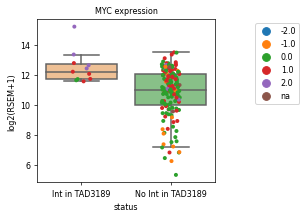

PVT1 TAD3189
No Int in TAD3189    151
Int in TAD3189        11
Name: status, dtype: int64
0.0     91
1.0     46
-1.0    13
2.0      8
na       4
Name: PVT1_cn, dtype: int64
RanksumsResult(statistic=2.5731286645685385, pvalue=0.010078373277524836)


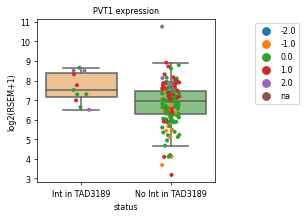

TP63 TAD2252
No Int in TAD2252    155
Int in TAD2252         7
Name: status, dtype: int64
1.0     99
0.0     32
2.0     25
na       4
-1.0     2
Name: TP63_cn, dtype: int64
RanksumsResult(statistic=1.8986848341426932, pvalue=0.057605926757411725)


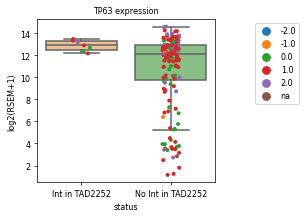

ERBB2 TAD1333
No Int in TAD1333    158
Int in TAD1333         4
Name: status, dtype: int64
0.0     114
1.0      25
-1.0     10
2.0       8
na        4
-2.0      1
Name: ERBB2_cn, dtype: int64
RanksumsResult(statistic=3.378178699479843, pvalue=0.0007296764660377305)


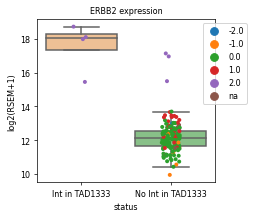

CDK12 TAD1333
No Int in TAD1333    158
Int in TAD1333         4
Name: status, dtype: int64
0.0     118
1.0      27
-1.0     11
na        4
2.0       2
Name: CDK12_cn, dtype: int64
RanksumsResult(statistic=1.0900832225158599, pvalue=0.27567648608096107)


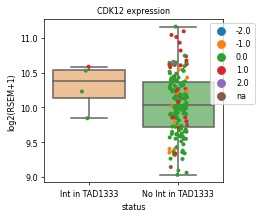

RAD51B TAD996
No Int in TAD996    156
Int in TAD996         6
Name: status, dtype: int64
0.0     103
1.0      32
-1.0     18
2.0       5
na        4
Name: RAD51B_cn, dtype: int64
RanksumsResult(statistic=0.6385448298780906, pvalue=0.52311908150587)


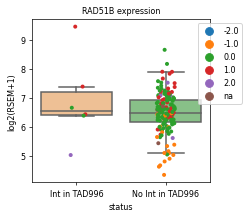

In [204]:
#plot gene exp for cancer genes in rec tad; samples which have int in that tad compared to those who dont

#sns.set_style("white")
for key, value in {'MYC':'TAD3189', 'PVT1':'TAD3189', 'TP63':'TAD2252',  \
             'ERBB2':'TAD1333', 'CDK12':'TAD1333', 'RAD51B':'TAD996'}.items():
    print(key,value)
    #exp in samples with int
    a=cesc_gene[cesc_gene['index'].isin(inter_tcga[inter_tcga['name']==value]['thickEnd'].unique().tolist())][['index', key]]
    a['status']='Int in '+ value
    #exp in samples which dont have int
    b=cesc_gene[~cesc_gene['index'].isin(inter_tcga[inter_tcga['name']==value]['thickEnd'].unique().tolist())][['index', key]]
    b['status']='No Int in '+  value
    c=pd.concat([a,b])
    d=cn_cesc[['index', key]]
    d=d.rename(columns={key:key+'_cn'})
    c=c.merge(d, on='index', how='left')
    c[key+'_cn']=c[key+'_cn'].fillna('na')
    print(c['status'].value_counts())
    print(c[key+'_cn'].value_counts())
    print(ss.ranksums(c[c['status']=='Int in '+ value][key], c[c['status']=='No Int in '+ value][key]))
    plt.figure(figsize=(3.2, 3))
    sns.boxplot(x='status', y=key, data=c, showfliers=False, palette=['#fdc086', '#7fc97f'])
    sns.stripplot(x='status', y=key, data=c, hue=key+'_cn', hue_order=[-2.0, -1.0 , 0.0, 1.0, 2.0, 'na' ], \
                  jitter=True, size=4)
    plt.legend(bbox_to_anchor=(1.2, 1), ncol=1)
    plt.ylabel('log2(RSEM+1)')
    plt.title(key + ' expression')
    #plt.savefig('../figs/fig3/'+key+'.svg')
    plt.show()


In [206]:
####

In [212]:
#mean expression in each cesc sample for the tads which have int in tcga samples
# and also for the neighbouring tads
tad_exp_neb=cesc_gene[['index']]

#Get list of tads which have int and the neighbouring tads
tad_df=pd.DataFrame()
tad_df['tad']=inter_tcga['name'].unique().tolist()
tad_df['tad']=tad_df['tad'].str.split('TAD', expand=True)[1].astype('int64')
tad_df['-1tad']=tad_df['tad']-1
tad_df['+1tad']=tad_df['tad']+1
for item in list(tad_df):
    tad_df[item]='TAD'+tad_df[item].astype('str')

tad_list=tad_df['tad'].tolist()+tad_df['-1tad'].tolist()+tad_df['+1tad'].tolist()
print(len(tad_list))
tad_list=list(set(tad_list))   #take unique 
print(len(tad_list))
tad_list=sorted(tad_list)

for item in tad_list:
    print(item)
    if item in hela_tad['index'].tolist():
        a=hela_tad[hela_tad['index']==item]
        # get list of genes in that particular tad
        b=BedTool.from_dataframe(a).intersect(BedTool.from_dataframe(hg19), loj=True)
        b=BedTool.to_dataframe(b)
        gene_list=b[12].unique().tolist()
        #print(len(b))
        #print(len(gene_list))
        #print(gene_list)
        gene_list=['index']+gene_list
        # get gene expression values 
        c=cesc_gene[cesc_gene.columns.intersection(gene_list)]
        #print(len(c.columns))
        if len(c.columns)==1:
            continue
        #mean expression for each patient for a tad
        c[item]=c.drop(columns=['index']).mean(axis=1)
        tad_exp_neb=tad_exp_neb.merge(c[['index', item]], on='index', how='left')
        
tad_exp_neb    

435
407
TAD0
TAD1


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1064


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1065


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD1066


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1079


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1080


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1081


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD1104


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1105


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1106


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1119


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1120


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1121


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1150


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1151


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1152


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1186


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1187


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD1188


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1216


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1217


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD1218


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1259


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1260


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1261


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1279


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1280


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1281


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1305


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1306


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1307


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1329


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1330


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1331


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1332


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1333


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1334


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1357


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1358


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1359


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1368


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1369


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1370


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1397


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1398


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1399


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD14


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1400


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1401


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1402


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1403


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1404


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1413


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1414


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1415


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD142


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD143


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD144


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD145


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD146


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1466


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1467


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1468


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD147


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1477


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1478


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1479


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1480


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD15


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1508


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1509


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1510


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1511


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1512


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1513


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1514


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1537


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1538


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1539


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1548


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1549


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1550


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1551


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1552


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1553


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1570


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1571


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1572


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1579


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1580


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1581


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1588


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1589


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1590


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD16


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1606


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1607


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1608


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1620


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1621


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1622


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1638


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1639


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1640


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1664


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1665


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1666


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD168


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD169


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD170


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1766


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1767


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1768


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD1769


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1770


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1771


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1772


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1789


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1790


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1791


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD18


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1852


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1853


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1854


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1875


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1876


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1877


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD19


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1913


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1914


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1915


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD193


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD194


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1940


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1941


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1942


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1944


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1945


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1946


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD195


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1980


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1981


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD1982


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD20


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2013


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2014


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2015


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2016


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2020


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2021


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2022


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2033


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2034


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2035


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2077


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD2078


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2079


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD21


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD212


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2123


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2124


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2125


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD213


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD214


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2144


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2145


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2146


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2164


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2165


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD2166


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2182


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2183


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2184


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD22


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2204


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2205


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2206


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD222


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2228


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2229


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD223


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2230


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2237


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2238


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2239


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD224


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2250


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2251


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2252


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2253


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2257


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2258


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2259


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2260


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2261


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2262


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2263


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2284


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2285


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2286


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD2302


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2303


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2304


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2319


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2320


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2321


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2365


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2366


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2367


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2432


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD2433


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2434


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD2445


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2446


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2447


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2470


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2471


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2472


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2531


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2532


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2533


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD254


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2547


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2548


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2549


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD255


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD256


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2578


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2579


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2580


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2583


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2584


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2585


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2589


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2590


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2591


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2628


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2629


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD263


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2630


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2631


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD264


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD265


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2662


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2663


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD2664


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2671


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2672


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2673


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2702


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2703


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2704


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2707


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2708


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2709


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2725


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2726


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD2727


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2747


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2748


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2749


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2780


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2781


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2782


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2841


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2842


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2843


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2844


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2845


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2964


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2965


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2966


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2996


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD2997


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD2998


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3032


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3033


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3034


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD3079


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3080


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3081


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3130


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3131


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3132


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3133


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3134


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3154


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3155


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3156


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3188


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD3189


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3190


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3270


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD3271


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3272


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3287


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3288


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3289


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3293


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3294


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3295


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3326


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD3327


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3328


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3357


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3358


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3359


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3367


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3368


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3369


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3370


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3371


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3410


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3411


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD3412


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3413


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3414


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3415


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3416


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3417


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3418


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3443


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3444


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3445


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3451


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3452


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3453


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3477


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3478


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3479


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3480


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3481


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD3482
TAD37


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD370


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD371


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD372


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD38


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD39


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD42


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD43


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD437


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD438


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD439


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD44


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD440


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD441


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD448


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD449


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD450


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD463


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD464


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD465


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD597


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD598


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD599


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD60


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD602


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD603


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD604


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD61


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD617


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD618


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD619


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD62


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD636


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD637


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD638


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD639


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD640


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD641


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD66


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD67


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD68


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD717


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD718


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD719


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD728


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD729


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD730


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD733


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD734


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD735


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD736


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD852


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD853


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD854


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD901


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD902


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD903


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD912


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD913


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD914


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD925


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD926


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD927


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD956


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD957


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD958


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))


TAD960


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD961


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD962


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD995


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD996


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


TAD997


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/pybedtools/bedtool.py:3287: UserWarning: Default names for filetype bed are:
['chrom', 'start', 'end', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
but file has 13 fields; you can supply custom names with the `names` kwarg
  % (self.file_type, _names, self.field_count()))
/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Hybridization REF,index,TAD1,TAD1064,TAD1066,TAD1079,TAD1080,TAD1104,TAD1105,TAD1106,TAD1119,...,TAD926,TAD927,TAD956,TAD957,TAD960,TAD961,TAD962,TAD995,TAD996,TAD997
0,TCGA-4J-AA1J,6.717883,8.561334,4.998682,9.100469,7.040270,8.182989,8.182989,8.274986,7.689772,...,1.484939,3.046474,2.238970,8.422904,7.207897,11.838517,7.339841,8.376316,9.906154,11.554792
1,TCGA-C5-A0TN,6.224692,7.603451,4.849879,8.603528,5.680682,7.527903,7.527903,6.201827,4.966324,...,0.497181,1.991535,4.625475,7.708044,7.510691,12.098190,6.996216,8.342349,9.367959,12.219323
2,TCGA-C5-A1BF,7.441617,7.332256,5.342599,8.833759,6.152630,7.860754,7.860754,7.003733,7.449264,...,1.683350,2.078781,3.380660,8.028816,6.978733,12.559930,7.493685,8.256783,9.662236,11.726493
3,TCGA-C5-A1BJ,7.553968,8.128345,5.594498,9.342897,6.549251,9.093889,9.093889,7.308836,6.149280,...,1.414306,2.018634,3.748343,8.248994,7.307233,12.209886,7.473028,8.114603,9.820068,11.350302
4,TCGA-C5-A1BN,6.629523,8.070230,4.670586,8.023055,6.134592,8.610903,8.610903,5.926212,5.690688,...,0.821974,2.183296,3.656954,7.806153,7.066546,12.539798,7.155154,8.339288,9.604692,11.237989
5,TCGA-C5-A1M8,6.671127,7.761671,4.921992,8.875780,6.695468,9.354678,9.354678,5.929158,6.663840,...,0.442201,0.358396,3.677035,6.998676,7.327049,13.264852,8.112240,9.238405,10.184649,11.029155
6,TCGA-C5-A1M9,6.281476,9.485941,5.615049,7.971518,5.876221,4.820419,4.820419,8.710628,7.124158,...,1.118874,3.820873,2.803475,7.928227,6.973838,12.914715,7.295089,7.640228,9.921431,11.131326
7,TCGA-C5-A1MI,7.043359,8.706751,5.716860,8.900447,5.907900,8.984860,8.984860,8.484854,7.538903,...,0.635653,1.844747,6.889231,10.034047,7.756844,12.402682,8.332416,7.930989,9.978048,12.001628
8,TCGA-C5-A1ML,8.671529,8.602840,5.224463,8.238322,5.806481,8.436603,8.436603,6.860646,7.694972,...,0.691168,1.878961,3.441762,7.057189,7.331608,11.749851,7.463567,9.217281,9.530647,11.273312
9,TCGA-C5-A1MQ,7.377529,6.760474,5.213080,8.550679,5.135587,7.373584,7.373584,6.030678,6.376909,...,1.116959,3.983349,0.753005,7.679998,6.555081,14.434999,6.862947,7.642697,9.297674,11.563669


In [214]:
print(tad_exp_neb.columns.nunique()) 
tad_exp_neb['index'].nunique()

381


162

In [220]:
tad_exp_neb.dropna().shape

(162, 381)

In [225]:
####

In [227]:
# make vifi like table for tad exp from integrated and control samples
# for the integrated as well as neighbouring tads
tad_exp_neb_table=pd.DataFrame(columns=['sample', 'exp_in_tad', 'tad', 'mean_exp_otherSam', 'median_exp_otherSam', 'int in', 'pos'])

for item in inter_tcga['name'].unique().tolist():
    tad_dict={'index':'nothing','TAD'+str(int(item.split('TAD')[1])-1):'-1 TAD', item: 'TAD with int', 'TAD'+str(int(item.split('TAD')[1])+1):'+1 TAD'}    
    print(list(tad_dict.keys()))
    a=tad_exp_neb[tad_exp_neb.columns.intersection(list(tad_dict.keys()))]
    #print(list(a))
    if len(a.columns)<3:  #stop if atleast one neighbouring tad is not there
        continue
    if item not in a.columns.tolist():   # proceed ahead only when the tad with int is there
        continue
    for tad in a.columns.tolist():
        if tad=='index':
            continue
        if tad==item:
            b=a[['index', tad ]]
            #print(len(b))
        else:
            b=a[['index', tad ]]
            # remove any sample with int in these flanking tads
            b=b[~b['index'].isin(inter_tcga[inter_tcga['name']==tad]['thickEnd'].unique().tolist())]
            #print(len(b))
        # get exp of tad from the sample which has int in the central tad
        df1=b[b['index'].isin(inter_tcga[inter_tcga['name']==item]['thickEnd'].unique().tolist())][['index', tad]]
        df1['tad']=tad
        df1['mean']=b[~b['index'].isin(inter_tcga[inter_tcga['name']==item]['thickEnd'].unique().tolist())][tad].mean()
        df1['median']=b[~b['index'].isin(inter_tcga[inter_tcga['name']==item]['thickEnd'].unique().tolist())][tad].median()
        df1['int in']=item
        df1['pos']=tad_dict[tad]
        df1.columns=tad_exp_neb_table.columns
        tad_exp_neb_table=pd.concat([tad_exp_neb_table, df1], ignore_index=True)

        

tad_exp_neb_table

['index', 'TAD0', 'TAD1', 'TAD2']
['index', 'TAD14', 'TAD15', 'TAD16']
['index', 'TAD18', 'TAD19', 'TAD20']
['index', 'TAD20', 'TAD21', 'TAD22']
['index', 'TAD37', 'TAD38', 'TAD39']
['index', 'TAD42', 'TAD43', 'TAD44']
['index', 'TAD60', 'TAD61', 'TAD62']
['index', 'TAD66', 'TAD67', 'TAD68']
['index', 'TAD142', 'TAD143', 'TAD144']
['index', 'TAD145', 'TAD146', 'TAD147']
['index', 'TAD168', 'TAD169', 'TAD170']
['index', 'TAD193', 'TAD194', 'TAD195']
['index', 'TAD212', 'TAD213', 'TAD214']
['index', 'TAD222', 'TAD223', 'TAD224']
['index', 'TAD254', 'TAD255', 'TAD256']
['index', 'TAD263', 'TAD264', 'TAD265']
['index', 'TAD370', 'TAD371', 'TAD372']
['index', 'TAD437', 'TAD438', 'TAD439']
['index', 'TAD438', 'TAD439', 'TAD440']
['index', 'TAD439', 'TAD440', 'TAD441']
['index', 'TAD448', 'TAD449', 'TAD450']
['index', 'TAD463', 'TAD464', 'TAD465']
['index', 'TAD597', 'TAD598', 'TAD599']
['index', 'TAD602', 'TAD603', 'TAD604']
['index', 'TAD617', 'TAD618', 'TAD619']
['index', 'TAD636', 'TAD637

,sample,exp_in_tad,tad,mean_exp_otherSam,median_exp_otherSam,int in,pos
0,TCGA-Q1-A73P,8.422148,TAD1,7.219105,7.129667,TAD1,TAD with int
1,TCGA-Q1-A73P,8.489007,TAD2,8.800717,8.790443,TAD1,+1 TAD
2,TCGA-DG-A2KJ,8.683412,TAD14,10.271705,10.340196,TAD15,-1 TAD
3,TCGA-DG-A2KJ,8.578071,TAD15,7.039453,7.065480,TAD15,TAD with int
4,TCGA-DG-A2KJ,6.312066,TAD16,7.138161,7.128897,TAD15,+1 TAD
5,TCGA-EA-A3HQ,6.488946,TAD18,6.083682,6.135631,TAD19,-1 TAD
6,TCGA-EA-A3HQ,8.267463,TAD19,7.320605,7.295288,TAD19,TAD with int
7,TCGA-EA-A3HQ,6.061336,TAD20,6.116173,6.247903,TAD19,+1 TAD
8,TCGA-Q1-A5R2,5.744720,TAD20,6.118139,6.247903,TAD21,-1 TAD
9,TCGA-Q1-A5R2,5.887537,TAD21,5.304671,5.290778,TAD21,TAD with int


In [246]:
tad_exp_neb_table.dropna().shape

(472, 7)

In [250]:
#compute paired wilcoxon test
for item in tad_exp_neb_table['pos'].unique().tolist():
    print(item)
    print(ss.wilcoxon(tad_exp_neb_table[tad_exp_neb_table['pos']==item]['exp_in_tad'],\
                      tad_exp_neb_table[tad_exp_neb_table['pos']==item]['mean_exp_otherSam']))
 

TAD with int
WilcoxonResult(statistic=2725.0, pvalue=4.334107178891799e-12)
+1 TAD
WilcoxonResult(statistic=5964.0, pvalue=0.7784561077001667)
-1 TAD
WilcoxonResult(statistic=4382.0, pvalue=0.040953926719236255)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TAD with int_exp_in_tad vs. TAD with int_mean_exp_otherSam: P=4.33e-12
-1 TAD_exp_in_tad vs. -1 TAD_mean_exp_otherSam: P=0.040
+1 TAD_exp_in_tad vs. +1 TAD_mean_exp_otherSam: P=0.77


(-0.5, 16.0)

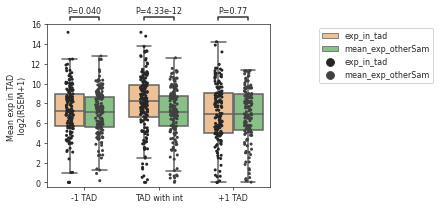

In [254]:
# plot expresssion in TAD in samples having int compared to the rest of sample
# for neighbouring TAD also
# with p values
sns.set_style(style='ticks')
plt.figure(figsize=(4,3))

pairs=[[('TAD with int', 'exp_in_tad'), ('TAD with int', 'mean_exp_otherSam')],\
       [('-1 TAD', 'exp_in_tad'),       ('-1 TAD', 'mean_exp_otherSam')],\
       [('+1 TAD', 'exp_in_tad'),       ('+1 TAD', 'mean_exp_otherSam')]]

pvalues=['P=4.33e-12', 'P=0.040', 'P=0.77']


ax=sns.boxplot(x='pos', y='value',  hue='variable',\
            data=tad_exp_neb_table.melt(value_vars=['exp_in_tad', 'mean_exp_otherSam'], id_vars=['pos']),\
            order=['-1 TAD', 'TAD with int', '+1 TAD'], showfliers=False, palette=['#fdc086', '#7fc97f'])

sns.stripplot(x='pos', y='value',  hue='variable',\
            data=tad_exp_neb_table.melt(value_vars=['exp_in_tad', 'mean_exp_otherSam'], id_vars=['pos']),\
             dodge=True, color='.25', jitter=True, order=['-1 TAD', 'TAD with int', '+1 TAD'], size=3)

# Add annotations
annotator = Annotator(ax, pairs, x='pos', y='value',  hue='variable',\
            data=tad_exp_neb_table.melt(value_vars=['exp_in_tad', 'mean_exp_otherSam'], id_vars=['pos']),\
            order=['-1 TAD', 'TAD with int', '+1 TAD'], showfliers=False, palette=['#fdc086', '#7fc97f'] )
annotator.configure(loc='outside')
annotator.set_custom_annotations(pvalues)
annotator.annotate()


plt.ylabel('Mean exp in TAD \n log2(RSEM+1)')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.2, 1), ncol=1)
plt.ylim(-0.5, 16)
#plt.savefig('../figs/fig3/hela_tad_neb_exp.svg')



In [201]:
##

# classify tads based on no of int in them

In [259]:
#no of ints in sample-tad combo
a=inter_tcga.groupby(['thickEnd', 'name']).size().reset_index()
a.columns=['sample', 'int in', 'no_int']
a

,sample,int in,no_int
0,TCGA-4J-AA1J,TAD2021,2
1,TCGA-4J-AA1J,TAD2630,16
2,TCGA-4J-AA1J,TAD996,2
3,TCGA-C5-A0TN,TAD2165,2
4,TCGA-C5-A1BJ,TAD2252,1
5,TCGA-C5-A1BJ,TAD2320,4
6,TCGA-C5-A1BN,TAD1479,9
7,TCGA-C5-A1M8,TAD438,2
8,TCGA-C5-A1M8,TAD439,4
9,TCGA-C5-A1M9,TAD1333,2


In [260]:
a['no_int'].sum()

529

In [265]:
a['no_int'].value_counts()

1     74
2     48
3     15
4     12
7      6
8      5
5      5
6      4
11     3
9      3
16     2
10     2
23     1
Name: no_int, dtype: int64

In [276]:
#merge with table
tad_exp_neb_table=tad_exp_neb_table.merge(a, on=['sample', 'int in'], how='left')
tad_exp_neb_table

,sample,exp_in_tad,tad,mean_exp_otherSam,median_exp_otherSam,int in,pos,no_int
0,TCGA-Q1-A73P,8.422148,TAD1,7.219105,7.129667,TAD1,TAD with int,10
1,TCGA-Q1-A73P,8.489007,TAD2,8.800717,8.790443,TAD1,+1 TAD,10
2,TCGA-DG-A2KJ,8.683412,TAD14,10.271705,10.340196,TAD15,-1 TAD,2
3,TCGA-DG-A2KJ,8.578071,TAD15,7.039453,7.065480,TAD15,TAD with int,2
4,TCGA-DG-A2KJ,6.312066,TAD16,7.138161,7.128897,TAD15,+1 TAD,2
5,TCGA-EA-A3HQ,6.488946,TAD18,6.083682,6.135631,TAD19,-1 TAD,2
6,TCGA-EA-A3HQ,8.267463,TAD19,7.320605,7.295288,TAD19,TAD with int,2
7,TCGA-EA-A3HQ,6.061336,TAD20,6.116173,6.247903,TAD19,+1 TAD,2
8,TCGA-Q1-A5R2,5.744720,TAD20,6.118139,6.247903,TAD21,-1 TAD,2
9,TCGA-Q1-A5R2,5.887537,TAD21,5.304671,5.290778,TAD21,TAD with int,2


In [278]:
tad_exp_neb_table['no_int'].count()

472

In [285]:
tad_exp_neb_table[tad_exp_neb_table['pos']=='TAD with int']['no_int'].value_counts()

1     69
2     44
3     14
4     12
7      6
8      5
6      4
5      4
11     3
9      3
16     2
10     2
23     1
Name: no_int, dtype: int64

In [286]:
#take only tad with int
b=tad_exp_neb_table[tad_exp_neb_table['pos']=='TAD with int']
b

,sample,exp_in_tad,tad,mean_exp_otherSam,median_exp_otherSam,int in,pos,no_int
0,TCGA-Q1-A73P,8.422148,TAD1,7.219105,7.129667,TAD1,TAD with int,10
3,TCGA-DG-A2KJ,8.578071,TAD15,7.039453,7.065480,TAD15,TAD with int,2
6,TCGA-EA-A3HQ,8.267463,TAD19,7.320605,7.295288,TAD19,TAD with int,2
9,TCGA-Q1-A5R2,5.887537,TAD21,5.304671,5.290778,TAD21,TAD with int,2
12,TCGA-C5-A1M9,10.232935,TAD38,10.614426,10.637719,TAD38,TAD with int,1
15,TCGA-VS-A8EG,11.045075,TAD43,9.664759,9.696510,TAD43,TAD with int,3
18,TCGA-EK-A2RE,11.981298,TAD61,7.298571,7.462890,TAD61,TAD with int,1
21,TCGA-C5-A7UI,13.165875,TAD67,5.610057,5.524557,TAD67,TAD with int,1
24,TCGA-EA-A411,9.228526,TAD143,7.323180,7.349367,TAD143,TAD with int,7
27,TCGA-EA-A411,9.406071,TAD146,9.151580,9.176092,TAD146,TAD with int,1


In [291]:
#categorize
def cat(row):
    if row['no_int']==1:
        return '1'
    elif row['no_int']==2:
        return '2'
    else:
        return '>2'
    
b['no_int_cat']=b.apply(cat, axis=1)
print(b['no_int_cat'].value_counts())
b

1     69
>2    56
2     44
Name: no_int_cat, dtype: int64


/home/sabari/anuragks/miniconda3/envs/genomic_bl/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,sample,exp_in_tad,tad,mean_exp_otherSam,median_exp_otherSam,int in,pos,no_int,no_int_cat
0,TCGA-Q1-A73P,8.422148,TAD1,7.219105,7.129667,TAD1,TAD with int,10,>2
3,TCGA-DG-A2KJ,8.578071,TAD15,7.039453,7.065480,TAD15,TAD with int,2,2
6,TCGA-EA-A3HQ,8.267463,TAD19,7.320605,7.295288,TAD19,TAD with int,2,2
9,TCGA-Q1-A5R2,5.887537,TAD21,5.304671,5.290778,TAD21,TAD with int,2,2
12,TCGA-C5-A1M9,10.232935,TAD38,10.614426,10.637719,TAD38,TAD with int,1,1
15,TCGA-VS-A8EG,11.045075,TAD43,9.664759,9.696510,TAD43,TAD with int,3,>2
18,TCGA-EK-A2RE,11.981298,TAD61,7.298571,7.462890,TAD61,TAD with int,1,1
21,TCGA-C5-A7UI,13.165875,TAD67,5.610057,5.524557,TAD67,TAD with int,1,1
24,TCGA-EA-A411,9.228526,TAD143,7.323180,7.349367,TAD143,TAD with int,7,>2
27,TCGA-EA-A411,9.406071,TAD146,9.151580,9.176092,TAD146,TAD with int,1,1


In [297]:
b.melt(value_vars=['exp_in_tad', 'mean_exp_otherSam'], id_vars=['no_int_cat']).head()

,no_int_cat,variable,value
0,>2,exp_in_tad,8.422148
1,2,exp_in_tad,8.578071
2,2,exp_in_tad,8.267463
3,2,exp_in_tad,5.887537
4,1,exp_in_tad,10.232935


(-0.5, 16.0)

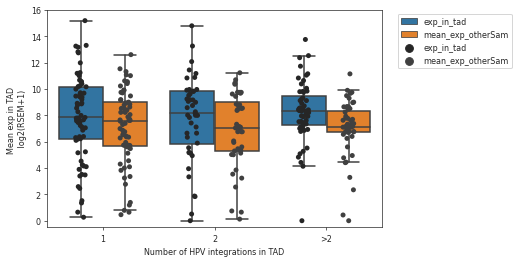

In [313]:
#plot exp in tad with int, with controls
#separated by no of int in tads

sns.boxplot(x='no_int_cat', y='value', hue='variable', \
            data=b.melt(value_vars=['exp_in_tad', 'mean_exp_otherSam'], id_vars=['no_int_cat']), \
            order=['1', '2', '>2'], showfliers=False)

sns.stripplot(x='no_int_cat', y='value', hue='variable', \
            data=b.melt(value_vars=['exp_in_tad', 'mean_exp_otherSam'], id_vars=['no_int_cat']), \
            order=['1', '2', '>2'], color='.25', dodge=True)

plt.xlabel('Number of HPV integrations in TAD')
plt.ylabel('Mean exp in TAD \n log2(RSEM+1)')
plt.legend(bbox_to_anchor=(1.4, 1))
plt.ylim(-0.5, 16)

In [318]:
#wilcoxon test 
for item in b['no_int_cat'].unique():
    print(item)
    print(ss.wilcoxon(b[b['no_int_cat']==item]['exp_in_tad'], b[b['no_int_cat']==item]['mean_exp_otherSam']))

>2
WilcoxonResult(statistic=157.0, pvalue=2.8057295658254893e-07)
2
WilcoxonResult(statistic=143.0, pvalue=3.992594432350004e-05)
1
WilcoxonResult(statistic=741.0, pvalue=0.005284193765793455)


In [324]:
########################